In [2]:
import numpy as np
import os
import matplotlib.pyplot as plt
import MDAnalysis as mda 
import matplotlib.pyplot as plt
from MDAnalysis.analysis import align
import Bio

import useful_functions
import residue
import config
import __init__

aminoacid_ensemble = []

for aminoacid in config.aminoacids:
    aminoacid_ensemble.append(residue.Residue(aminoacid, config.len_aminoacids[aminoacid], config.source, config.conformations, config.output, config.threshold))




In [11]:
import requests
import os
from tqdm import tqdm  # For progress visualization

# Directory to save the downloaded PDB files
os.makedirs("pdb_structures", exist_ok=True)

# RCSB API search endpoint
query_url = "https://search.rcsb.org/rcsbsearch/v2/query"

# Search criteria: Resolution < 1.8Å, Year 2010–2020
query = {
    "query": {
        "type": "group",
        "logical_operator": "and",
        "nodes": [
            {
                "type": "terminal",
                "service": "text",
                "parameters": {
                    "attribute": "rcsb_entry_info.resolution_combined",
                    "operator": "less_or_equal",
                    "value": "1.8"
                }
            },
            {
                "type": "terminal",
                "service": "text",
                "parameters": {
                    "attribute": "rcsb_accession_info.initial_release_date",
                    "operator": "between",
                    "value": ["2010-01-01", "2020-12-31"]
                }
            }
        ]
    },
    "return_type": "entry"
}

# Request to fetch matching PDB IDs
response = requests.post(query_url, json=query)
if response.status_code == 200:
    pdb_ids = response.json().get("result_set", [])
    print(f"Found {len(pdb_ids)} structures.")

    # Download each PDB file
    base_url = "https://files.rcsb.org/download/{}.pdb"
    for entry in tqdm(pdb_ids, desc="Downloading PDB files"):
        pdb_id = entry["identifier"]
        pdb_data = requests.get(base_url.format(pdb_id))
        
        with open(f"pdb_structures/{pdb_id}.pdb", "wb") as file:
            file.write(pdb_data.content)
else:
    print("Failed to fetch data from RCSB PDB API.")

TypeError: 'Response' object is not subscriptable

In [2]:
while True:
    analized_prote  = input("quin fitxer de proteïna vols analitzar? Escriu break per parar")
    if analized_prote == "break":
        break
    u = mda.Universe(config.source+"/"+analized_prote)
    for i in range(len(aminoacid_ensemble)):
        aminoacid_ensemble[i].add_universe(u, analized_prote, verbose = True)

quin fitxer de proteïna vols analitzar? Escriu break per parar 2eab.pdb


Aminoacid: 
Name='ALA' 
Number of atoms in residue= '5' 
Number of conformations found='4'
Total of conformations analyzed='171'
RMSD Threshhold used= '0.223606797749979'
 
Aminoacid: 
Name='ARG' 
Number of atoms in residue= '11' 
Number of conformations found='26'
Total of conformations analyzed='52'
RMSD Threshhold used= '0.33166247903554'
 
Aminoacid: 
Name='ASN' 
Number of atoms in residue= '8' 
Number of conformations found='27'
Total of conformations analyzed='141'
RMSD Threshhold used= '0.28284271247461906'
 
Aminoacid: 
Name='ASP' 
Number of atoms in residue= '8' 
Number of conformations found='17'
Total of conformations analyzed='105'
RMSD Threshhold used= '0.28284271247461906'
 
Aminoacid: 
Name='CYS' 
Number of atoms in residue= '6' 
Number of conformations found='3'
Total of conformations analyzed='6'
RMSD Threshhold used= '0.2449489742783178'
 
Aminoacid: 
Name='GLN' 
Number of atoms in residue= '9' 
Number of conformations found='20'
Total of conformations analyzed='62'
R

quin fitxer de proteïna vols analitzar? Escriu break per parar break


In [4]:
print(aminoacid_ensemble[0].conformations)

[Conformation of 'ALA' with '88' instances first seen in '2eab.pdb', Conformation of 'ALA' with '14' instances first seen in '2eab.pdb', Conformation of 'ALA' with '61' instances first seen in '2eab.pdb', Conformation of 'ALA' with '8' instances first seen in '2eab.pdb']


In [2]:
#Per llegir directament totes les dades
for file in os.listdir(config.source+"/"):
    print(file)
    if file.endswith(".pdb"):
        u = mda.Universe(config.source+"/"+file)
        for i in range(len(aminoacid_ensemble)):
            aminoacid_ensemble[i].add_universe(u, os.path.splitext(file)[0],verbose = True)  

6mu9.pdb
Aminoacid: 
Name='ALA' 
Number of atoms in residue= '5' 
Number of conformations found='5'
Total of conformations analyzed='29'
RMSD Threshhold used= '0.223606797749979'
 
Aminoacid: 
Name='ARG' 
Number of atoms in residue= '11' 
Number of conformations found='11'
Total of conformations analyzed='13'
RMSD Threshhold used= '0.33166247903554'
 
Aminoacid: 
Name='ASN' 
Number of atoms in residue= '8' 
Number of conformations found='9'
Total of conformations analyzed='15'
RMSD Threshhold used= '0.28284271247461906'
 
Aminoacid: 
Name='ASP' 
Number of atoms in residue= '8' 
Number of conformations found='11'
Total of conformations analyzed='24'
RMSD Threshhold used= '0.28284271247461906'
 
Aminoacid: 
Name='CYS' 
Number of atoms in residue= '6' 
Number of conformations found='0'
Total of conformations analyzed='0'
RMSD Threshhold used= '0.2449489742783178'
 
Aminoacid: 
Name='GLN' 
Number of atoms in residue= '9' 
Number of conformations found='4'
Total of conformations analyzed='7

/Users/deumenec/myenv/TFGenv/lib/python3.13/site-packages/MDAnalysis/coordinates/PDB.py:453: UserWarning: 1 A^3 CRYST1 record, this is usually a placeholder. Unit cell dimensions will be set to None.
  warnings.warn("1 A^3 CRYST1 record,"


Aminoacid: 
Name='ALA' 
Number of atoms in residue= '5' 
Number of conformations found='7'
Total of conformations analyzed='3235'
RMSD Threshhold used= '0.223606797749979'
 
Aminoacid: 
Name='ARG' 
Number of atoms in residue= '11' 
Number of conformations found='325'
Total of conformations analyzed='1539'
RMSD Threshhold used= '0.33166247903554'
 
Aminoacid: 
Name='ASN' 
Number of atoms in residue= '8' 
Number of conformations found='78'
Total of conformations analyzed='1662'
RMSD Threshhold used= '0.28284271247461906'
 
Aminoacid: 
Name='ASP' 
Number of atoms in residue= '8' 
Number of conformations found='90'
Total of conformations analyzed='2119'
RMSD Threshhold used= '0.28284271247461906'
 
Aminoacid: 
Name='CYS' 
Number of atoms in residue= '6' 
Number of conformations found='19'
Total of conformations analyzed='478'
RMSD Threshhold used= '0.2449489742783178'
 
Aminoacid: 
Name='GLN' 
Number of atoms in residue= '9' 
Number of conformations found='143'
Total of conformations analy

In [3]:
print(os.listdir(config.source+"/"))

['6mu9.pdb', '4cnn.pdb', '5vfb.pdb', '4lgy.pdb', '5cec.pdb', '3lez.pdb', '8cm6.pdb', '6t7l.pdb', '3d1k.pdb', '7s4o.pdb', '4hdr.pdb', '6g8k.pdb', '5orf.pdb', '6ooe.pdb', '6c9x.pdb', '5ok6.pdb', '.DS_Store', '4zar.pdb', '4xxr.pdb', '6c7e.pdb', '3ro8.pdb', '3uqy.pdb', '7f82.pdb', '4tvv.pdb', '4ddy.pdb', '4i3g.pdb', '6sba.pdb', '7pcx.pdb', '7ffx.pdb', '2hds.pdb', '3w4o.pdb', '4eqi.pdb', '3e2d.pdb', '6gjf.pdb', '5u00.pdb', '5npz.pdb', '2rtj.pdb', '8zkw.pdb', '8sov.pdb', '3bmx.pdb', '7rxv.pdb', '6unb.pdb', '1yly.pdb', '2eab.pdb', '5njf.pdb', '9mxv.pdb', '3wwx.pdb', '7l1a.pdb', '1mpl.pdb', '7eam.pdb', '6v2p.pdb', '4irl.pdb', '3v39.pdb', '5y0l.pdb', '6tep.pdb', '6dvm.pdb', '6ofq.pdb', '6joz.pdb', '2rta.pdb', '7ddm.pdb', '7vn0.pdb', '7rxx.pdb', '5qqr.pdb', '1ym1.pdb', '1c0p.pdb', '7w3e.pdb', '3g2y.pdb', '5xyq.pdb', '8fum.pdb', '3dt4.pdb', '1ylp.pdb', '4fb2.pdb', '1iki.pdb', '7au1.pdb', '7pul.pdb', '1scw.pdb', '1yt4.pdb', '6r2j.pdb', '1n9b.pdb', '4jvo.pdb', '7c7d.pdb', '8ynv.pdb', '4dwr.pdb', '4

In [3]:
for i in range(len(aminoacid_ensemble)):
    aminoacid_ensemble[i].save()

/Users/deumenec/myenv/TFGenv/lib/python3.13/site-packages/MDAnalysis/coordinates/PDB.py:1154: UserWarning: Found no information for attr: 'formalcharges' Using default value of '0'
  warnings.warn("Found no information for attr: '{}'"
/Users/deumenec/myenv/TFGenv/lib/python3.13/site-packages/MDAnalysis/coordinates/PDB.py:777: UserWarning: Unit cell dimensions not found. CRYST1 record set to unitary values.
  warnings.warn("Unit cell dimensions not found. "


In [2]:
for i in range(len(aminoacid_ensemble)):
    aminoacid_ensemble[i].open()

/Users/deumenec/myenv/TFGenv/lib/python3.13/site-packages/MDAnalysis/coordinates/PDB.py:453: UserWarning: 1 A^3 CRYST1 record, this is usually a placeholder. Unit cell dimensions will be set to None.
  warnings.warn("1 A^3 CRYST1 record,"


In [6]:
while True:
    analized_prote  = input("quin fitxer de proteïna vols analitzar? Escriu break per parar")
    if analized_prote == "break":
        break
    u = mda.Universe(config.source+"/"+analized_prote)
    for i in range(len(aminoacid_ensemble)):
        aminoacid_ensemble[i].add_universe(u, verbose = True)

quin fitxer de proteïna vols analitzar? Escriu break per parar 8zkw_model_0.pdb


Aminoacid: 
Name='ALA' 
Number of atoms in residue= '5' 
Number of conformations found='9'
Total of conformations analyzed='47'
RMSD Threshhold used= '0.223606797749979'
 
Aminoacid: 
Name='ARG' 
Number of atoms in residue= '11' 
Number of conformations found='450'
Total of conformations analyzed='17'
RMSD Threshhold used= '0.33166247903554'
 
Aminoacid: 
Name='ASN' 
Number of atoms in residue= '8' 
Number of conformations found='91'
Total of conformations analyzed='23'
RMSD Threshhold used= '0.28284271247461906'
 
Aminoacid: 
Name='ASP' 
Number of atoms in residue= '8' 
Number of conformations found='110'
Total of conformations analyzed='11'
RMSD Threshhold used= '0.28284271247461906'
 
Aminoacid: 
Name='CYS' 
Number of atoms in residue= '6' 
Number of conformations found='21'
Total of conformations analyzed='15'
RMSD Threshhold used= '0.2449489742783178'
 
Aminoacid: 
Name='GLN' 
Number of atoms in residue= '9' 
Number of conformations found='183'
Total of conformations analyzed='19'

quin fitxer de proteïna vols analitzar? Escriu break per parar break


quin fitxer de proteïna vols analitzar? Escriu break per parar 7w1c_ver2.pdb


ALA
[4685, 1817, 400, 16, 320, 5, 15]
[47, 85, 32, 3, 9, 0, 0]


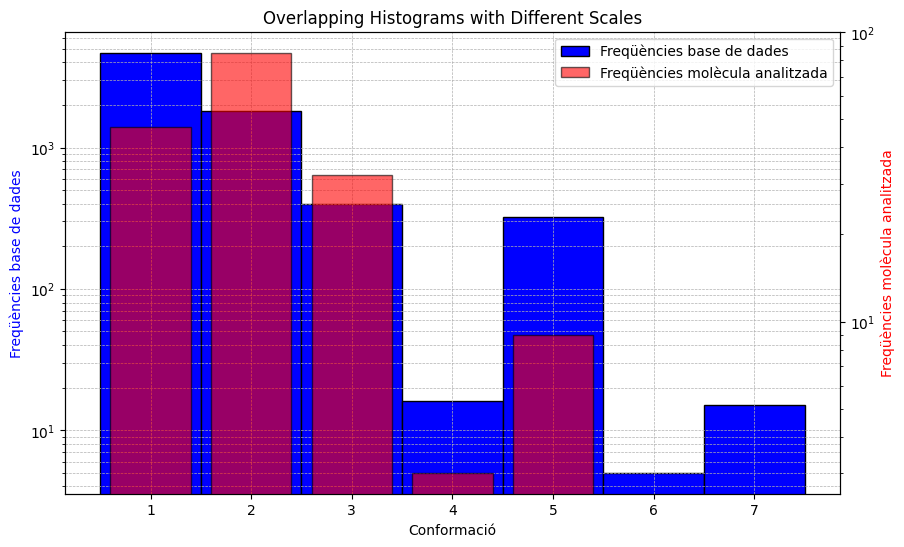

ARG
[63, 21, 31, 23, 42, 15, 26, 61, 8, 39, 9, 23, 15, 3, 5, 49, 113, 57, 2, 28, 58, 3, 9, 4, 4, 3, 32, 2, 40, 35, 40, 2, 9, 40, 2, 9, 10, 3, 7, 3, 11, 5, 25, 2, 24, 2, 2, 5, 8, 3, 1, 36, 49, 9, 92, 17, 5, 19, 3, 5, 8, 9, 13, 9, 3, 32, 1, 11, 2, 4, 98, 16, 15, 1, 2, 1, 1, 4, 5, 12, 4, 2, 1, 14, 21, 3, 6, 3, 6, 12, 5, 14, 16, 2, 17, 17, 11, 48, 29, 10, 39, 14, 32, 1, 2, 7, 8, 3, 10, 11, 3, 21, 20, 2, 7, 11, 6, 2, 2, 5, 16, 1, 2, 3, 7, 6, 20, 12, 14, 2, 1, 4, 1, 4, 7, 2, 11, 2, 1, 7, 3, 3, 2, 2, 2, 21, 7, 5, 9, 2, 11, 1, 1, 1, 1, 3, 3, 1, 1, 7, 10, 1, 2, 15, 1, 4, 3, 1, 3, 2, 7, 9, 1, 6, 2, 5, 1, 1, 1, 2, 1, 22, 4, 8, 1, 1, 1, 3, 1, 1, 2, 1, 1, 1, 30, 1, 1, 11, 3, 2, 4, 5, 4, 1, 15, 3, 6, 6, 10, 2, 32, 8, 2, 8, 4, 22, 2, 8, 7, 2, 4, 9, 7, 5, 2, 2, 4, 1, 12, 2, 2, 1, 3, 3, 10, 22, 3, 3, 8, 1, 1, 17, 2, 5, 2, 1, 2, 6, 6, 1, 1, 1, 7, 2, 4, 1, 2, 10, 1, 2, 1, 4, 2, 5, 2, 6, 3, 2, 4, 8, 1, 4, 1, 2, 1, 1, 1, 7, 8, 2, 9, 1, 1, 1, 8, 2, 4, 2, 1, 2, 3, 2, 1, 1, 1, 2, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1,

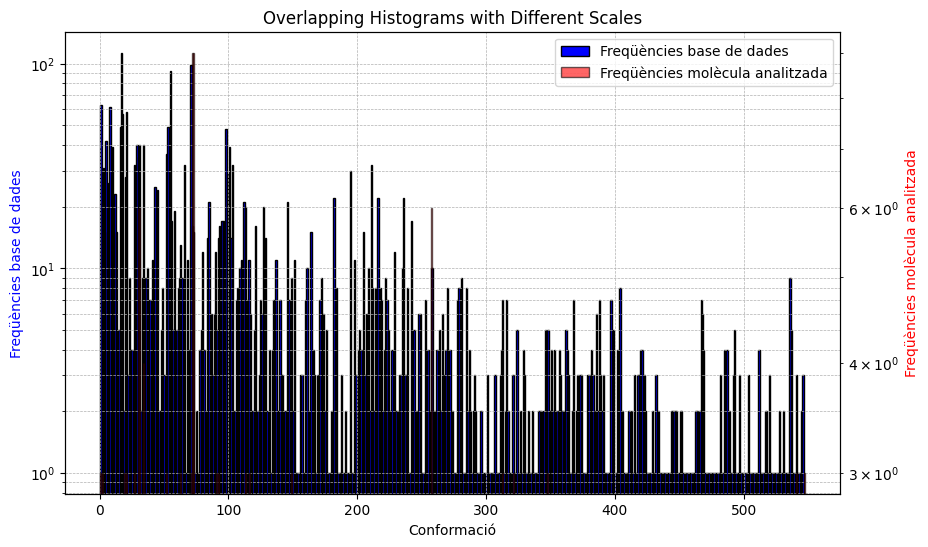

ASN
[84, 637, 73, 105, 292, 49, 172, 102, 244, 42, 88, 3, 102, 116, 138, 56, 4, 40, 96, 35, 63, 54, 34, 28, 4, 20, 31, 7, 12, 38, 16, 10, 36, 2, 3, 11, 7, 35, 23, 19, 1, 2, 2, 2, 9, 42, 47, 1, 3, 2, 5, 4, 3, 19, 1, 4, 7, 2, 1, 3, 31, 11, 2, 7, 1, 8, 1, 1, 4, 1, 2, 3, 6, 1, 5, 7, 4, 5, 3, 1, 1, 4, 1, 4, 2, 2, 4, 1, 1, 1, 2, 2, 1, 2, 0]
[3, 19, 3, 14, 0, 6, 9, 3, 9, 0, 0, 0, 0, 3, 6, 0, 0, 9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 9, 6, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3]


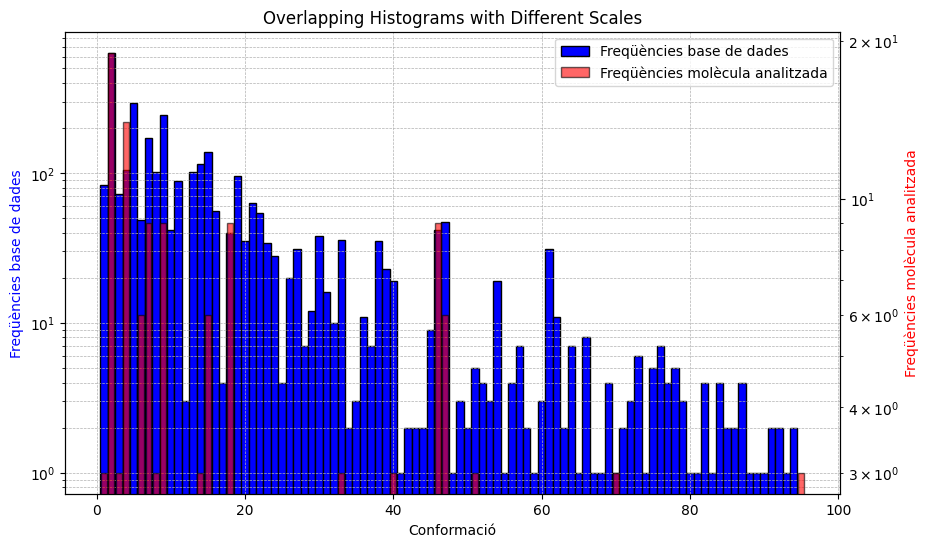

ASP
[1164, 157, 235, 10, 219, 489, 90, 153, 27, 94, 311, 152, 55, 159, 59, 92, 14, 153, 39, 18, 14, 63, 13, 62, 40, 3, 4, 9, 14, 7, 21, 6, 45, 19, 14, 17, 3, 7, 4, 4, 3, 8, 1, 9, 1, 3, 11, 2, 2, 4, 8, 3, 1, 8, 5, 1, 4, 2, 7, 2, 1, 3, 1, 6, 1, 3, 4, 19, 2, 1, 9, 3, 5, 1, 12, 3, 2, 10, 4, 2, 8, 1, 3, 2, 3, 2, 6, 16, 5, 2, 1, 1, 2, 2, 2, 1, 2, 1, 1, 2, 1, 1, 1, 3, 1, 1, 2, 1, 1, 2, 1]
[15, 6, 21, 0, 0, 12, 6, 0, 2, 0, 18, 0, 0, 6, 0, 3, 0, 6, 0, 0, 0, 6, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


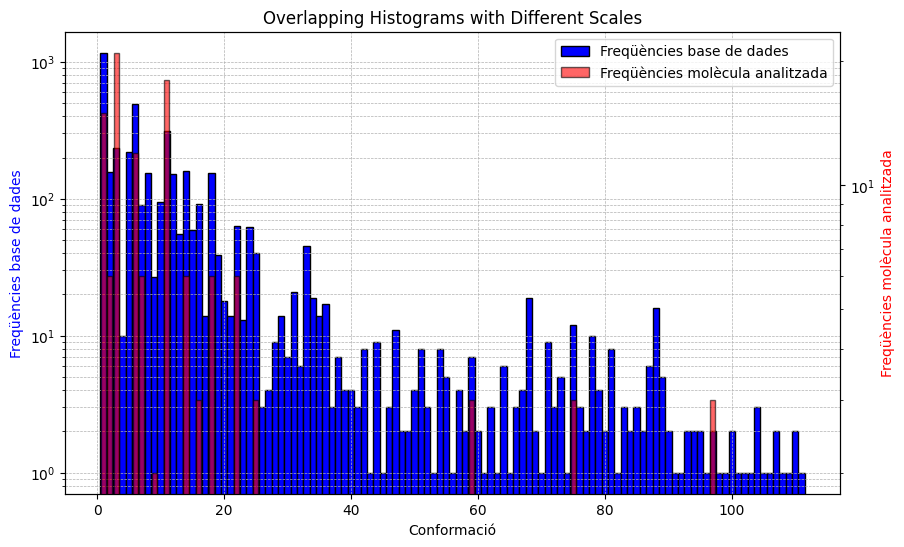

CYS
[193, 127, 143, 84, 75, 80, 44, 48, 2, 3, 20, 1, 3, 22, 2, 5, 8, 1, 1, 1, 1, 1]
[3, 0, 0, 0, 24, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


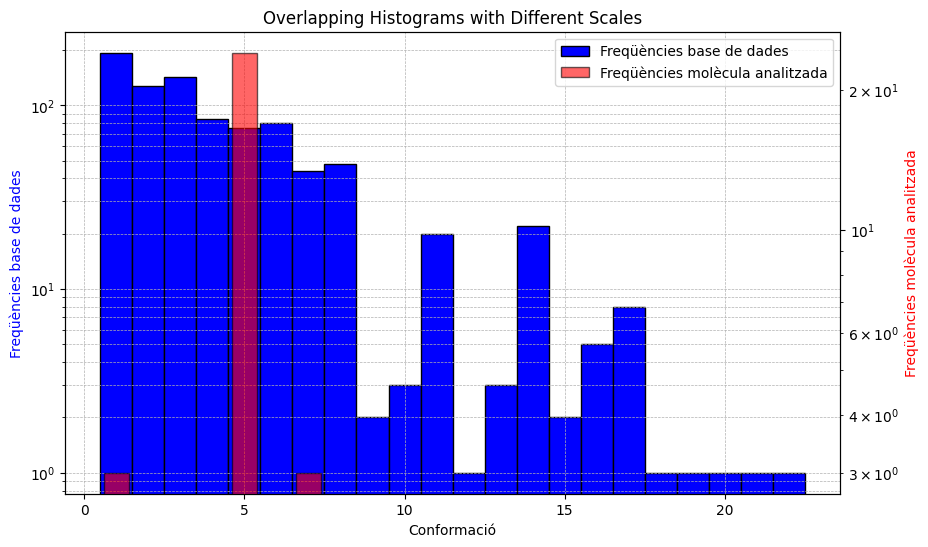

GLN
[231, 151, 94, 120, 15, 6, 37, 16, 77, 20, 59, 159, 33, 26, 77, 49, 29, 29, 60, 43, 35, 31, 1, 30, 21, 14, 10, 18, 1, 9, 8, 53, 3, 12, 28, 4, 4, 19, 21, 22, 18, 5, 9, 10, 9, 15, 7, 13, 4, 9, 26, 11, 22, 14, 7, 46, 10, 5, 2, 3, 21, 8, 18, 17, 4, 9, 3, 12, 5, 16, 3, 31, 26, 9, 15, 1, 1, 4, 6, 1, 2, 2, 1, 6, 1, 4, 4, 13, 3, 1, 10, 4, 5, 2, 21, 1, 1, 1, 1, 1, 2, 1, 3, 1, 1, 15, 35, 13, 7, 20, 13, 11, 17, 10, 8, 8, 5, 1, 3, 1, 8, 8, 6, 1, 4, 7, 2, 4, 3, 2, 1, 1, 5, 4, 3, 9, 1, 7, 1, 2, 1, 6, 1, 2, 4, 5, 2, 1, 1, 4, 15, 2, 2, 2, 1, 2, 2, 2, 3, 4, 2, 3, 3, 1, 2, 1, 2, 6, 6, 4, 1, 1, 2, 1, 2, 2, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 4, 2, 2, 1, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 6, 2, 3, 0, 3, 0, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

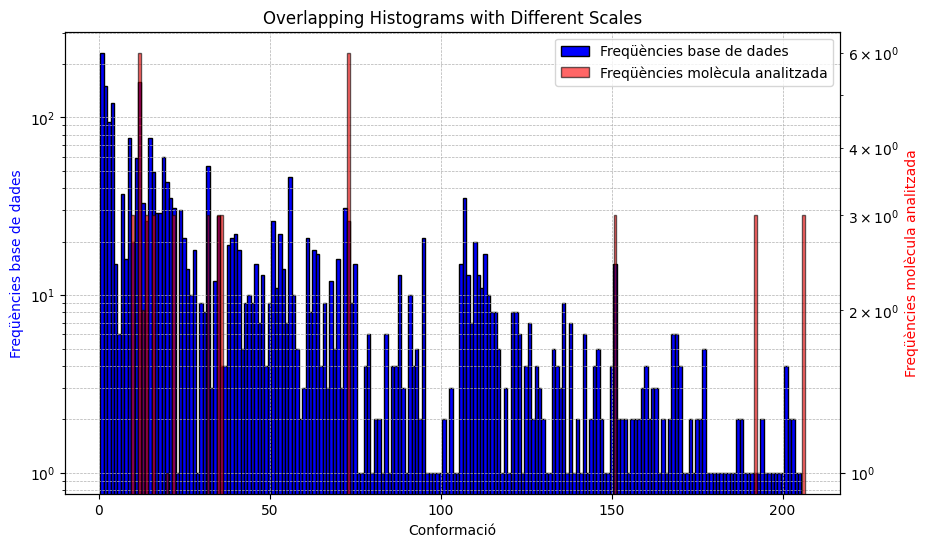

GLU
[195, 293, 115, 67, 6, 97, 125, 137, 42, 33, 23, 42, 178, 246, 59, 41, 119, 21, 22, 12, 20, 47, 30, 2, 27, 15, 84, 8, 35, 33, 9, 77, 40, 106, 15, 35, 40, 16, 1, 11, 26, 20, 8, 8, 8, 211, 16, 6, 47, 7, 2, 10, 9, 4, 4, 2, 16, 11, 4, 10, 2, 24, 19, 5, 25, 8, 31, 21, 18, 41, 1, 10, 2, 11, 2, 55, 8, 24, 7, 2, 16, 7, 3, 5, 19, 7, 3, 18, 8, 3, 11, 4, 7, 2, 2, 2, 1, 2, 16, 4, 3, 4, 2, 17, 5, 1, 4, 4, 1, 1, 2, 3, 1, 2, 2, 1, 5, 2, 9, 2, 5, 3, 2, 2, 1, 2, 4, 1, 1, 1, 9, 11, 4, 1, 2, 1, 1, 3, 2, 5, 1, 3, 1, 2, 1, 1, 2, 3, 1, 1, 4, 2, 1, 1, 6, 3, 1, 3, 14, 1, 1, 3, 5, 1, 1, 1, 2, 5, 1, 3, 3, 1, 16, 7, 7, 9, 3, 8, 3, 5, 14, 2, 3, 6, 10, 7, 4, 2, 1, 2, 1, 1, 6, 1, 4, 2, 2, 2, 1, 3, 2, 3, 1, 6, 4, 1, 6, 5, 5, 1, 3, 1, 1, 3, 1, 7, 3, 1, 3, 12, 2, 2, 2, 1, 2, 2, 3, 8, 2, 3, 2, 1, 2, 1, 1, 2, 3, 6, 4, 6, 1, 2, 3, 4, 1, 3, 2, 1, 2, 1, 1, 2, 1, 1, 3, 1, 1, 2, 1, 2, 1, 1, 4, 1, 6, 2, 1, 4, 2, 2, 1, 1, 3, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1]
[0, 0, 6, 12, 0, 0, 3, 0, 1, 0, 6, 1, 3, 0, 0, 0, 0, 0, 0, 0, 3

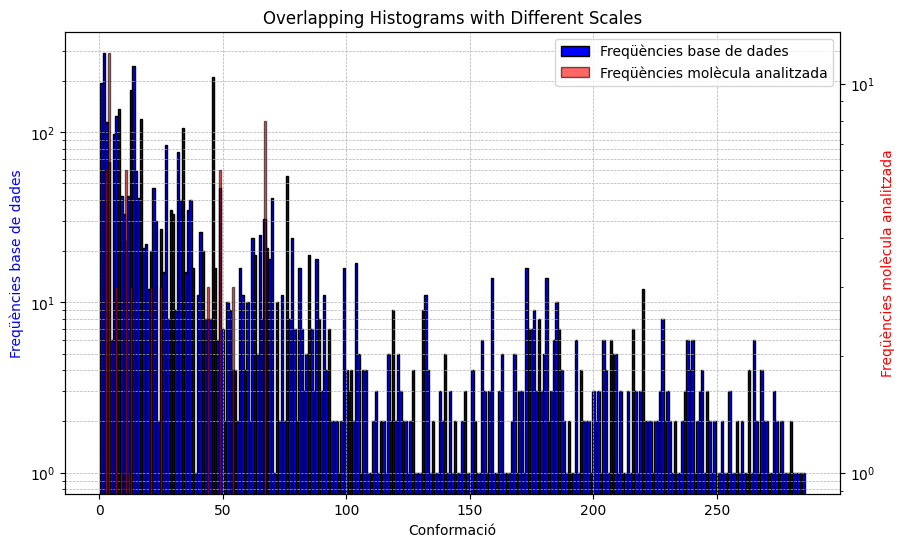

GLY
[1414, 2177, 1247, 1033, 43, 30]
[60, 72, 30, 24, 3, 0]


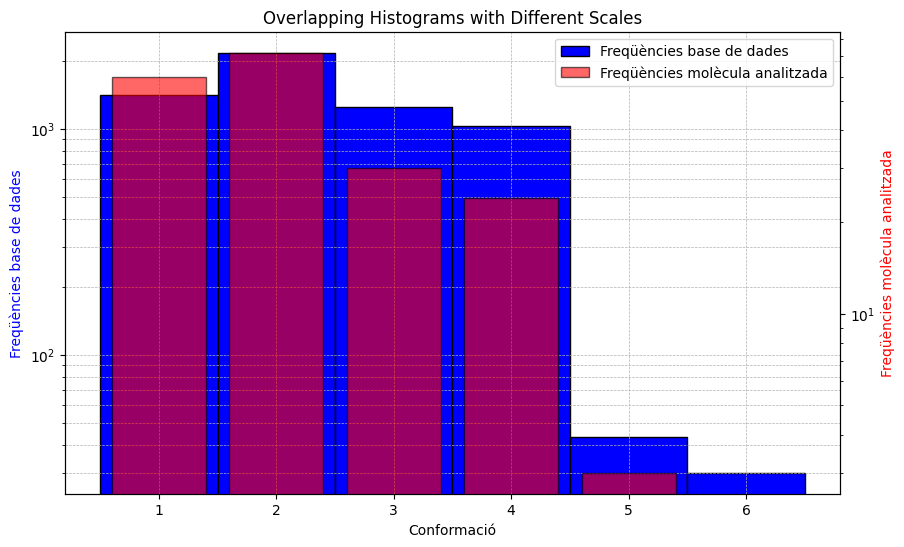

HIS
[34, 51, 117, 119, 161, 75, 77, 179, 27, 82, 96, 7, 26, 58, 2, 16, 128, 32, 23, 74, 8, 12, 62, 16, 6, 7, 19, 49, 13, 6, 6, 7, 15, 2, 4, 3, 5, 8, 10, 3, 2, 2, 5, 12, 9, 21, 2, 2, 4, 2, 2, 2, 6, 1, 4, 1, 1, 1, 2, 2, 3, 5, 3, 1, 1, 1, 2, 3]
[0, 0, 0, 6, 0, 0, 0, 3, 0, 3, 0, 0, 0, 6, 0, 0, 6, 0, 3, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


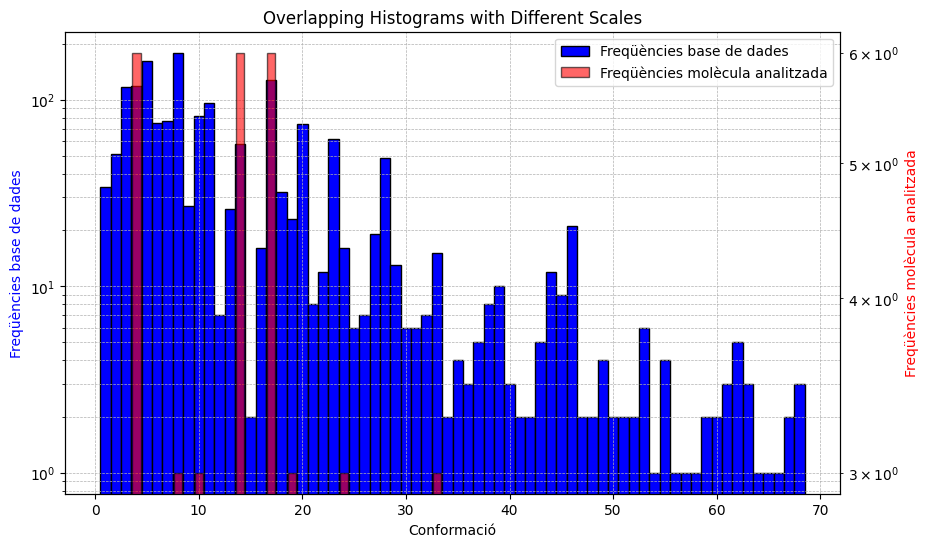

ILE
[1085, 313, 232, 243, 271, 1010, 59, 27, 159, 71, 85, 12, 6, 1, 10, 1, 7, 1, 10, 3, 6, 8, 2, 20, 2, 1, 2, 1, 1, 3, 1, 1, 3, 2, 5, 2]
[3, 6, 0, 3, 12, 60, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


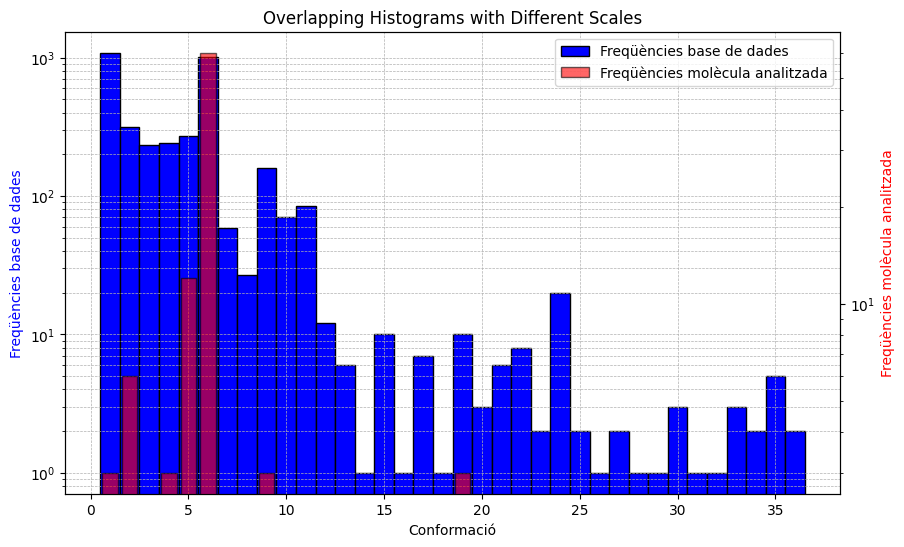

LEU
[2580, 1017, 1336, 70, 46, 715, 51, 12, 62, 48, 40, 19, 3, 22, 3, 8, 47, 57, 3, 19, 1, 16, 6, 2, 16, 5, 10, 64, 2, 5, 2, 5, 10, 3, 5, 1, 16, 28, 2, 2, 29, 56, 16, 2, 12, 14, 6, 6, 3, 4, 2, 2, 2, 3, 3, 1, 1, 1, 1, 1, 3, 1, 1, 2, 2, 2, 7]
[18, 2, 51, 0, 0, 33, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


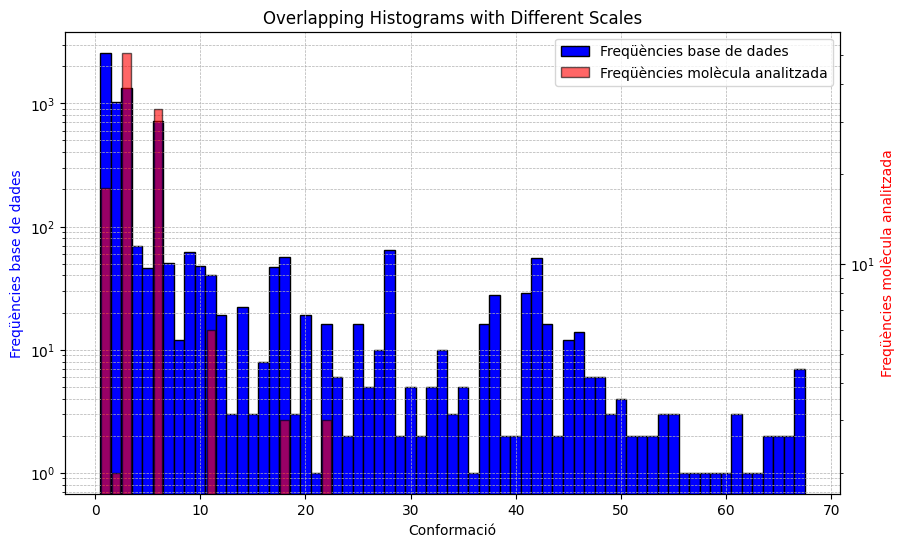

LYS
[198, 258, 202, 67, 76, 45, 250, 59, 34, 35, 68, 23, 14, 26, 46, 41, 60, 54, 4, 35, 31, 12, 16, 12, 15, 22, 26, 41, 21, 29, 1, 2, 2, 9, 9, 158, 26, 13, 1, 30, 2, 52, 4, 9, 7, 6, 9, 18, 8, 2, 6, 4, 7, 109, 19, 11, 12, 22, 28, 18, 1, 11, 19, 12, 8, 14, 1, 5, 7, 5, 4, 48, 15, 2, 43, 5, 3, 3, 9, 12, 13, 3, 12, 28, 5, 9, 2, 1, 2, 1, 3, 7, 8, 4, 8, 3, 12, 2, 3, 6, 1, 6, 3, 2, 2, 7, 3, 5, 5, 28, 1, 2, 1, 2, 6, 10, 1, 3, 5, 3, 3, 1, 6, 4, 3, 6, 4, 3, 1, 3, 1, 4, 1, 1, 3, 2, 3, 4, 2, 1, 1, 1, 7, 1, 4, 1, 1, 3, 5, 1, 7, 1, 7, 1, 4, 1, 2, 1, 3, 1, 2, 1, 3, 3, 2, 2, 2, 3, 2, 1, 2, 1, 1, 1, 1, 1, 1, 3, 3, 3, 7, 3, 2, 1, 2, 1, 1, 1, 2, 3, 7, 3, 3, 1, 1, 7, 2, 6, 1, 1, 1, 3, 1, 1, 2, 2, 1, 2, 2, 1, 2, 1, 4, 3, 1, 2, 1, 1, 2, 2, 3, 1, 3, 1, 1, 2, 1, 6, 1, 1, 1, 2, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 18, 24, 4, 2, 1, 6, 3, 3, 11, 1, 14, 3, 1, 3, 8, 1, 2, 1, 2, 3, 3, 1, 1, 3, 2, 4, 2, 2, 1, 1, 1, 4, 1, 3, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 8, 2, 2, 1, 2, 1, 1, 1, 1, 1, 2, 3, 5, 1, 1, 1, 1, 2, 1, 3, 1, 1,

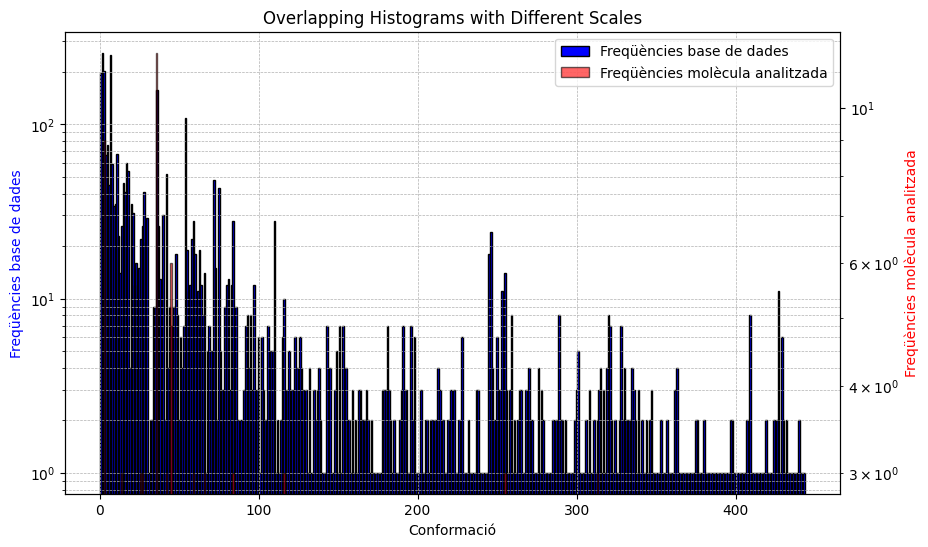

MET
[119, 156, 40, 98, 57, 18, 12, 58, 12, 39, 49, 63, 51, 8, 86, 22, 16, 12, 7, 1, 1, 5, 67, 12, 1, 23, 20, 34, 2, 17, 11, 13, 21, 2, 6, 26, 2, 12, 6, 21, 2, 1, 6, 1, 3, 7, 5, 36, 1, 4, 8, 14, 5, 2, 2, 3, 1, 7, 1, 3, 2, 1, 1, 12, 2, 4, 3, 5, 4, 6, 1, 4, 18, 1, 4, 1, 4, 10, 4, 1, 3, 1, 6, 2, 5, 1, 12, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 8, 5, 2, 2, 2, 2, 2, 1, 2, 6, 5, 1, 1, 1, 3, 2, 18, 1, 2, 1, 1, 1, 1, 1, 6, 1, 4, 2, 1, 2, 2, 1, 1, 1, 2, 4, 0, 0]
[3, 0, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3]


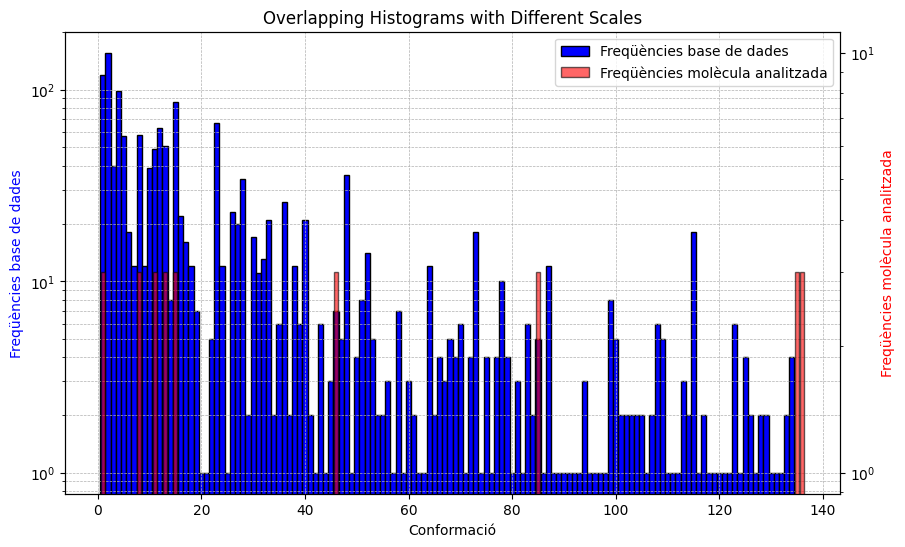

PHE
[428, 75, 225, 365, 92, 124, 142, 106, 42, 491, 104, 119, 83, 118, 35, 2, 31, 5, 6, 2, 12, 31, 20, 28, 39, 2, 3, 14, 29, 7, 29, 10, 5, 11, 3, 1, 4, 2, 2, 2, 3, 10, 7, 2, 6, 7, 2, 4, 1, 3, 2, 2, 3, 2, 1, 2, 2, 1, 1, 1, 4, 2, 4, 0]
[3, 0, 31, 23, 0, 0, 3, 0, 0, 3, 9, 0, 0, 3, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3]


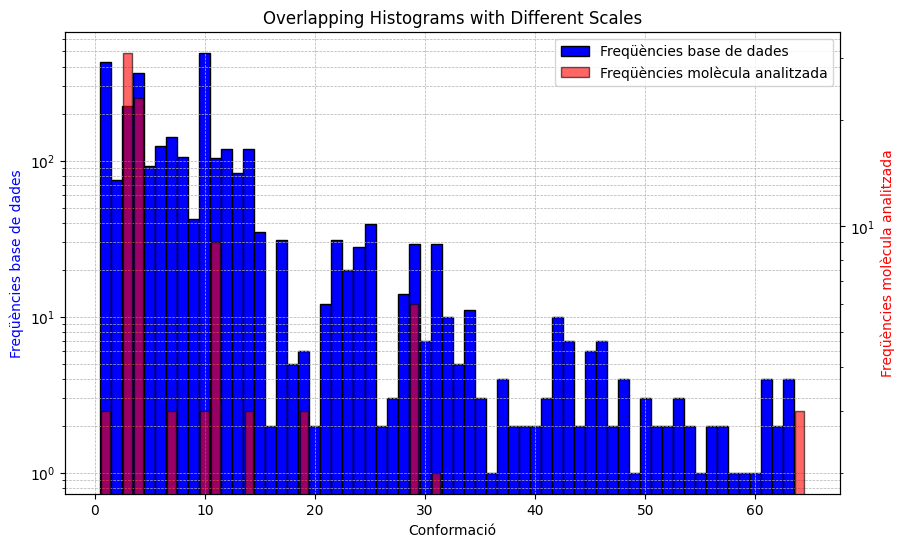

PRO
[801, 844, 1141, 895, 53, 10, 3, 2, 1, 4]
[6, 3, 15, 39, 0, 0, 0, 0, 0, 0]


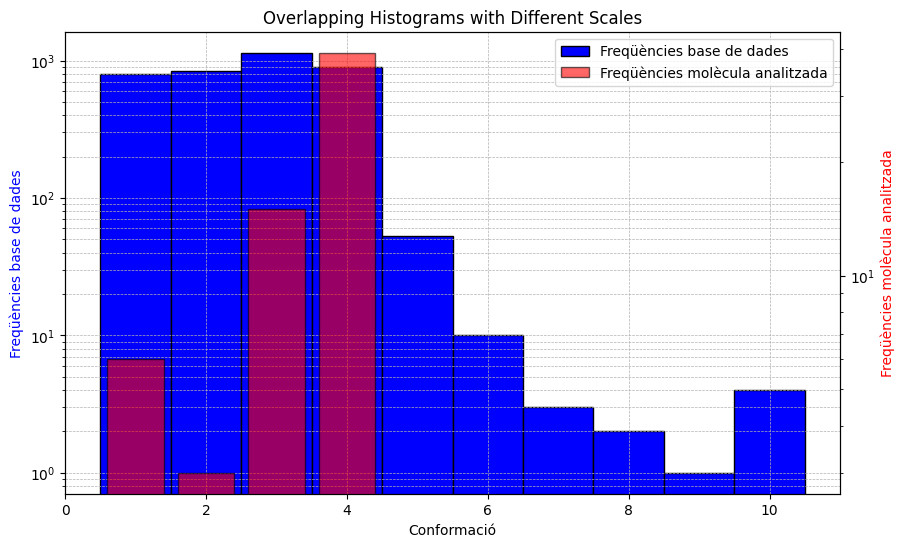

SER
[959, 386, 813, 235, 47, 89, 368, 487, 312, 123, 37, 26, 7, 46, 1, 4, 3, 3, 20, 4, 1, 1, 1, 2, 2, 1, 1, 1, 6, 1, 1]
[35, 6, 45, 3, 0, 0, 29, 33, 0, 3, 0, 1, 0, 8, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


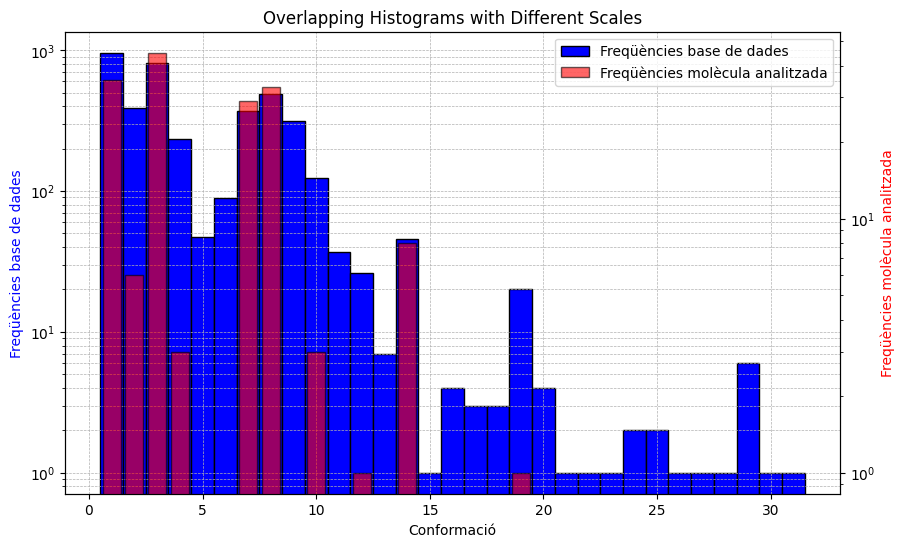

THR
[1053, 1054, 1135, 1135, 277, 63, 19, 35, 16, 2, 6, 4, 2, 1, 4, 4, 10, 1, 2, 2, 2, 1, 1, 2, 2, 1]
[33, 30, 9, 60, 15, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


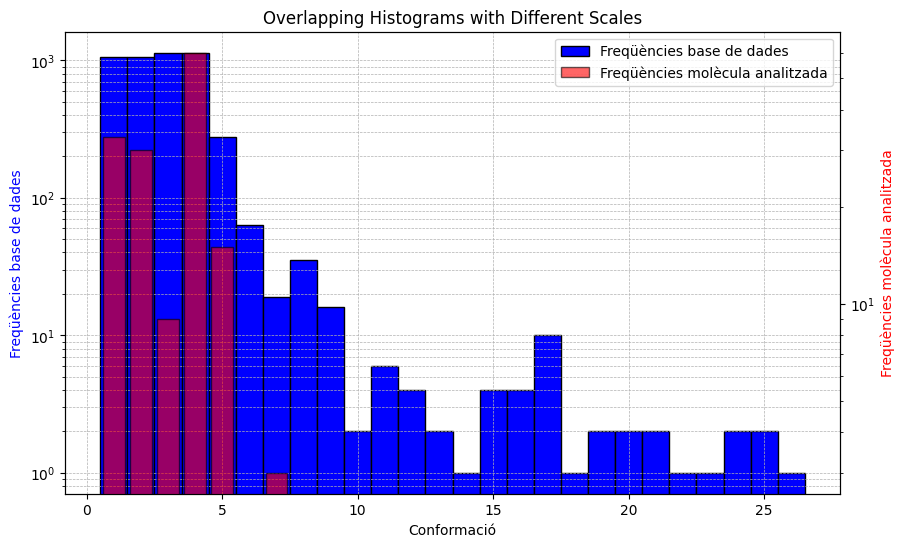

TRP
[78, 73, 67, 41, 161, 101, 177, 73, 86, 80, 12, 29, 15, 18, 7, 40, 8, 11, 13, 6, 27, 2, 4, 7, 7, 2, 4, 24, 14, 14, 7, 1, 14, 2, 4, 2, 5, 3, 2, 4, 0]
[0, 0, 3, 0, 0, 0, 0, 3, 3, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3]


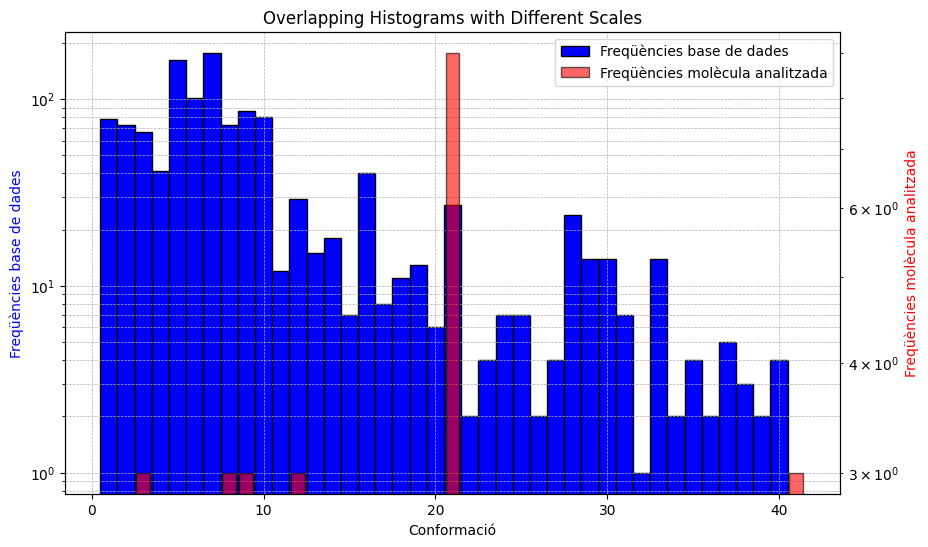

TYR
[407, 288, 10, 104, 121, 103, 66, 319, 364, 90, 67, 179, 19, 23, 11, 5, 9, 6, 7, 14, 77, 4, 32, 13, 4, 24, 3, 32, 8, 4, 5, 10, 15, 8, 4, 2, 3, 7, 1, 8, 1, 7, 1, 3, 3, 2, 1, 0]
[6, 12, 0, 0, 0, 0, 0, 0, 36, 0, 0, 18, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3]


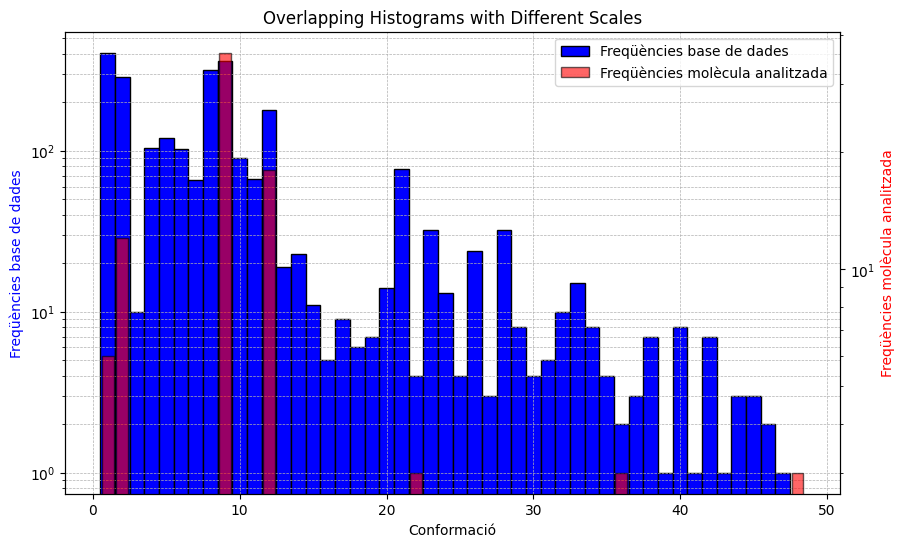

VAL
[1928, 1738, 18, 533, 144, 290, 238, 8, 8, 15, 4, 1, 4, 2, 1, 2, 3, 4, 2, 1, 4, 1, 1]
[146, 9, 0, 24, 0, 12, 9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


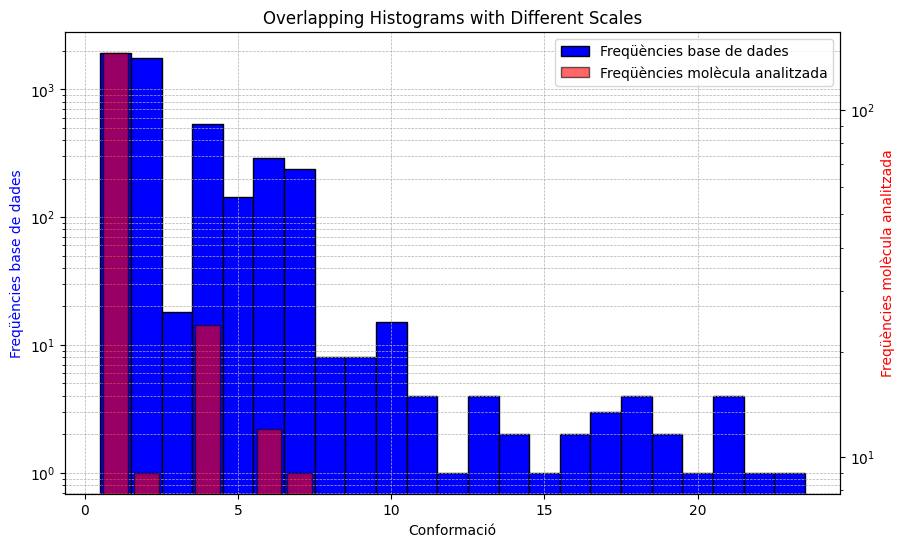

In [ ]:
while True:
    analized_prote  = input("quin fitxer de proteïna vols analitzar? Escriu break per parar")
    if analized_prote == "break":
        break
    u = mda.Universe(config.source_2+"/"+analized_prote)
    for i in range(len(aminoacid_ensemble)):
        freq_1, freq_2 = aminoacid_ensemble[i].frequencies_vector(u)
        useful_functions.ploter(freq_1, freq_2, config.output + "/" +os.path.splitext(analized_prote)[0], config.aminoacids[i]+os.path.splitext(analized_prote)[0], "pdf")

In [ ]:
[40, 84, 36, 16, 4, 0]
[31, 85, 35, 25, 2, 0]
7w1c_ver2.pdb

[1928, 1738, 18, 533, 144, 290, 238, 8, 8, 15, 4, 1, 4, 2, 1, 2, 3, 4, 2, 1, 4, 1, 1]
[3, 39, 0, 1, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


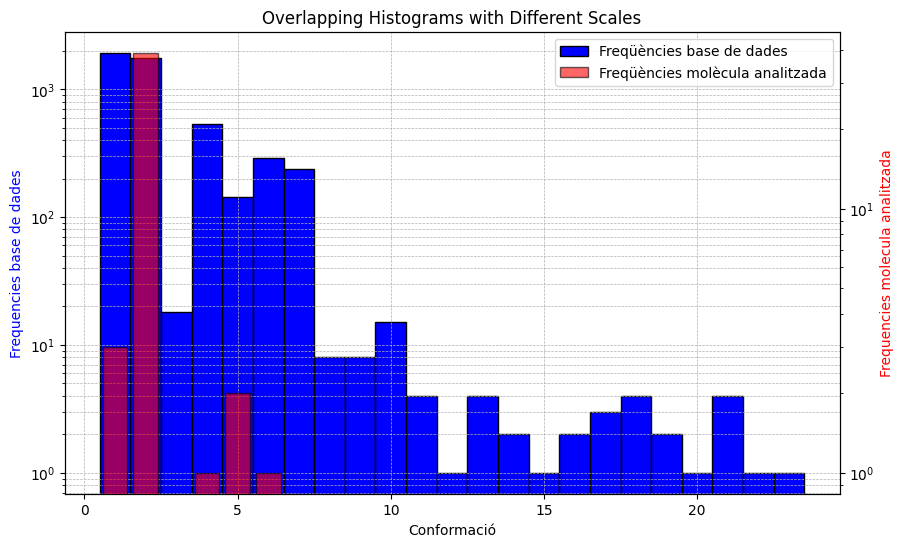

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data

freq_11 = [1928, 1738, 18, 533, 144, 290, 238, 8, 8, 15, 4, 1, 4, 2, 1, 2, 3, 4, 2, 1, 4, 1, 1] 
freq_12 = [1931, 1777, 18, 534, 146, 291, 238, 8, 8, 15, 4, 1, 4, 2, 1, 2, 3, 4, 2, 1, 4, 1, 1]
useful_functions.ploter(freq_11, freq_12, "VAL")

In [3]:
########################################################################################################
#                                                                                                      #
#  Project:  TFG chemistry                                                                             #
#  Author:   Domènec Huerta Estradé                                                                    #
#  Date:     03/01/2025                                                                                #
#  Purpose:  Executing the conformation classification algorithm                                       #
#                                                                                                      #
########################################################################################################

import numpy as np
import os
import matplotlib.pyplot as plt
import MDAnalysis as mda 
import matplotlib.pyplot as plt
from MDAnalysis.analysis import align

import useful_functions
import residue
import config
import __init__

aminoacid_ensemble = []

for aminoacid in config.aminoacids:
    aminoacid_ensemble.append(residue.Residue(aminoacid, config.len_aminoacids[aminoacid], config.source, config.conformations, config.output, config.threshold))


Train   = False     #Read into the conformational database the all the proteins stored in the dades folder
Read    = True      #Open the conformations saved in the conformacions folder
Save    = False     #Save the computed conformations into the conformacions folder
Analize = True      #Ask for molecule files to analize


if (Train == True):
    print(os.listdir(config.source+"/"))
    for file in os.listdir(config.source+"/"):
        print(file)
        if file.endswith(".pdb"):
            u = mda.Universe(config.source+"/"+file)
            for i in range(len(aminoacid_ensemble)):
                aminoacid_ensemble[i].add_universe(u, os.path.splitext(file)[0],verbose = True) 
                
if (Read == True):
    for i in range(len(aminoacid_ensemble)):
        aminoacid_ensemble[i].open()
    
if (Save == True):
    for i in range(len(aminoacid_ensemble)):
        aminoacid_ensemble[i].save()

if (Analize == True):
    while True:
        analized_prote  = input("quin fitxer de proteïna vols analitzar? Escriu break per parar")
        if analized_prote == "break":
            break
        u = mda.Universe(config.source_2+"/"+analized_prote)
        for i in range(len(aminoacid_ensemble)):
            freq_1, freq_2 = aminoacid_ensemble[i].frequencies_vector(u)
            useful_functions.ploter(freq_1, freq_2, config.output + "/" +os.path.splitext(analized_prote)[0], config.aminoacids[i]+os.path.splitext(analized_prote)[0], "pdf")
            
    

quin fitxer de proteïna vols analitzar? Escriu break per parar break


## Representació de les gràfiques

Quin fitxer de proteïna vols analitzar? Escriu break per parar 4v6h_unit.pdb
Quin fitxer de proteïna conté el model d'alphafold? 4v6h_model.pdb


ALA
ALA
[4685, 1817, 400, 16, 320, 5, 15] [4913, 1874, 411, 16, 320, 5, 15]
[4685 1817  400] [228  57  11] [228  60   8]


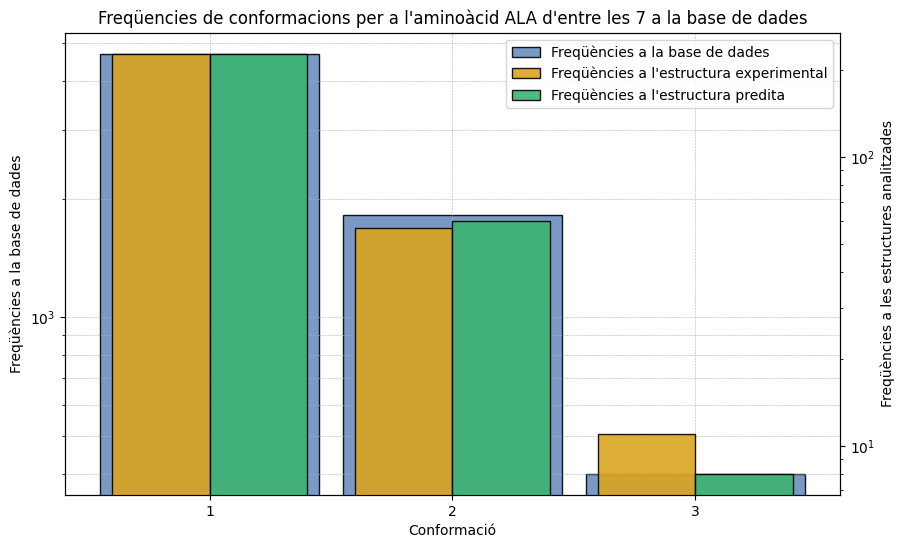

/Users/deumenec/myenv/TFGenv/lib/python3.13/site-packages/MDAnalysis/coordinates/PDB.py:453: UserWarning: 1 A^3 CRYST1 record, this is usually a placeholder. Unit cell dimensions will be set to None.
  warnings.warn("1 A^3 CRYST1 record,"


ARG
ARG
[63, 21, 31, 23, 42, 15, 26, 61, 8, 39, 9, 23, 15, 3, 5, 49, 113, 57, 2, 28, 58, 3, 9, 4, 4, 3, 32, 2, 40, 35, 40, 2, 9, 40, 2, 9, 10, 3, 7, 3, 11, 5, 25, 2, 24, 2, 2, 5, 8, 3, 1, 36, 49, 9, 92, 17, 5, 19, 3, 5, 8, 9, 13, 9, 3, 32, 1, 11, 2, 4, 98, 16, 15, 1, 2, 1, 1, 4, 5, 12, 4, 2, 1, 14, 21, 3, 6, 3, 6, 12, 5, 14, 16, 2, 17, 17, 11, 48, 29, 10, 39, 14, 32, 1, 2, 7, 8, 3, 10, 11, 3, 21, 20, 2, 7, 11, 6, 2, 2, 5, 16, 1, 2, 3, 7, 6, 20, 12, 14, 2, 1, 4, 1, 4, 7, 2, 11, 2, 1, 7, 3, 3, 2, 2, 2, 21, 7, 5, 9, 2, 11, 1, 1, 1, 1, 3, 3, 1, 1, 7, 10, 1, 2, 15, 1, 4, 3, 1, 3, 2, 7, 9, 1, 6, 2, 5, 1, 1, 1, 2, 1, 22, 4, 8, 1, 1, 1, 3, 1, 1, 2, 1, 1, 1, 30, 1, 1, 11, 3, 2, 4, 5, 4, 1, 15, 3, 6, 6, 10, 2, 32, 8, 2, 8, 4, 22, 2, 8, 7, 2, 4, 9, 7, 5, 2, 2, 4, 1, 12, 2, 2, 1, 3, 3, 10, 22, 3, 3, 8, 1, 1, 17, 2, 5, 2, 1, 2, 6, 6, 1, 1, 1, 7, 2, 4, 1, 2, 10, 1, 2, 1, 4, 2, 5, 2, 6, 3, 2, 4, 8, 1, 4, 1, 2, 1, 1, 1, 7, 8, 2, 9, 1, 1, 1, 8, 2, 4, 2, 1, 2, 3, 2, 1, 1, 1, 2, 1, 1, 1, 1, 3, 1, 1, 1, 1

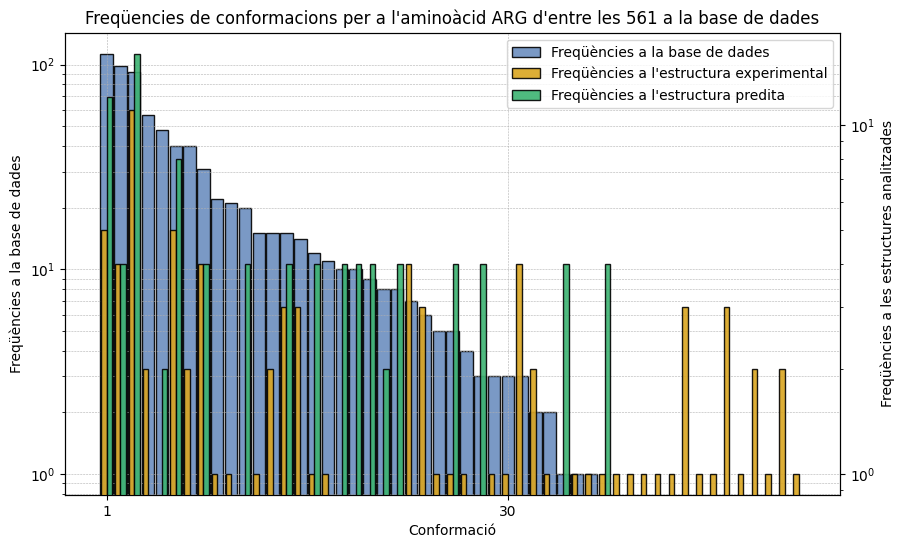

/Users/deumenec/myenv/TFGenv/lib/python3.13/site-packages/MDAnalysis/coordinates/PDB.py:453: UserWarning: 1 A^3 CRYST1 record, this is usually a placeholder. Unit cell dimensions will be set to None.
  warnings.warn("1 A^3 CRYST1 record,"


ASN
ASN
[84, 637, 73, 105, 292, 49, 172, 102, 244, 42, 88, 3, 102, 116, 138, 56, 4, 40, 96, 35, 63, 54, 34, 28, 4, 20, 31, 7, 12, 38, 16, 10, 36, 2, 3, 11, 7, 35, 23, 19, 1, 2, 2, 2, 9, 42, 47, 1, 3, 2, 5, 4, 3, 19, 1, 4, 7, 2, 1, 3, 31, 11, 2, 7, 1, 8, 1, 1, 4, 1, 2, 3, 6, 1, 5, 7, 4, 5, 3, 1, 1, 4, 1, 4, 2, 2, 4, 1, 1, 1, 2, 2, 1, 2] [84, 646, 73, 106, 294, 49, 172, 106, 248, 42, 88, 3, 102, 116, 143, 56, 4, 40, 99, 35, 67, 54, 34, 28, 4, 24, 35, 8, 12, 38, 16, 10, 36, 2, 3, 11, 7, 35, 23, 22, 1, 2, 2, 2, 9, 42, 47, 1, 3, 2, 5, 4, 3, 19, 1, 4, 7, 2, 1, 3, 31, 11, 2, 8, 1, 8, 1, 1, 4, 1, 2, 3, 6, 1, 5, 7, 4, 5, 4, 1, 1, 4, 1, 4, 2, 2, 6, 1, 1, 1, 2, 2, 1, 2]
[637  73 105 292 102 244 138  96  63  20  31   7  19   7   3   4] [9 0 1 2 4 4 5 3 4 4 4 1 3 1 1 2] [8 4 0 4 4 4 8 0 4 4 4 0 4 0 0 0]


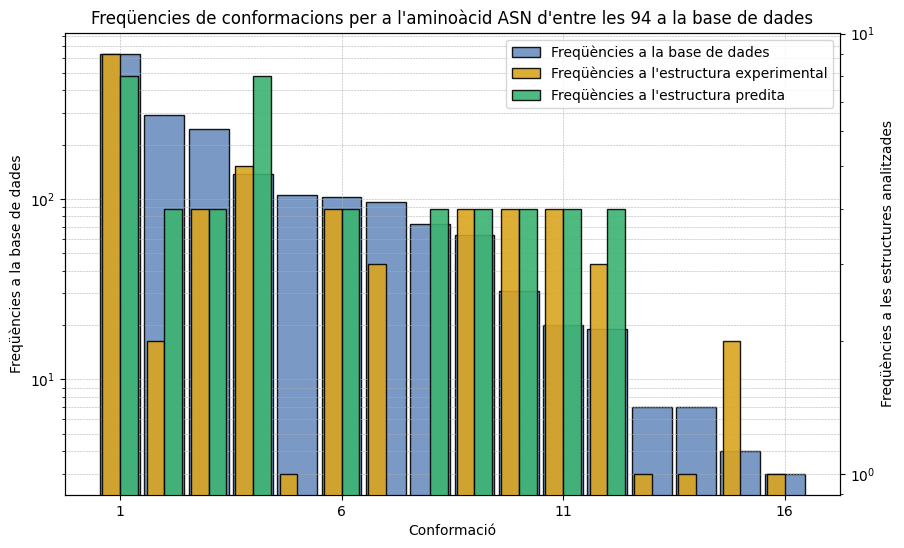

/Users/deumenec/myenv/TFGenv/lib/python3.13/site-packages/MDAnalysis/coordinates/PDB.py:453: UserWarning: 1 A^3 CRYST1 record, this is usually a placeholder. Unit cell dimensions will be set to None.
  warnings.warn("1 A^3 CRYST1 record,"


ASP
ASP
[1164, 157, 235, 10, 219, 489, 90, 153, 27, 94, 311, 152, 55, 159, 59, 92, 14, 153, 39, 18, 14, 63, 13, 62, 40, 3, 4, 9, 14, 7, 21, 6, 45, 19, 14, 17, 3, 7, 4, 4, 3, 8, 1, 9, 1, 3, 11, 2, 2, 4, 8, 3, 1, 8, 5, 1, 4, 2, 7, 2, 1, 3, 1, 6, 1, 3, 4, 19, 2, 1, 9, 3, 5, 1, 12, 3, 2, 10, 4, 2, 8, 1, 3, 2, 3, 2, 6, 16, 5, 2, 1, 1, 2, 2, 2, 1, 2, 1, 1, 2, 1, 1, 1, 3, 1, 1, 2, 1, 1, 2, 1] [1192, 161, 238, 10, 233, 493, 90, 159, 27, 95, 312, 152, 55, 159, 60, 92, 14, 157, 39, 19, 17, 67, 13, 66, 40, 4, 4, 9, 14, 7, 21, 6, 47, 19, 15, 17, 3, 7, 4, 4, 3, 8, 1, 9, 1, 3, 11, 2, 2, 4, 9, 3, 1, 8, 5, 1, 4, 2, 7, 2, 1, 3, 1, 6, 1, 3, 7, 20, 2, 1, 12, 4, 5, 1, 12, 3, 2, 10, 4, 2, 8, 1, 3, 2, 3, 2, 6, 16, 5, 2, 1, 1, 2, 2, 2, 1, 2, 1, 1, 2, 1, 1, 1, 3, 1, 1, 2, 1, 1, 2, 1, 1]
[1164  157  235  219  489  153   94  311   55   59  153   18   14   63
   62    3   45   14    8    4   19    9    3    4    0] [28  4  3 14  4  6  1  1  0  1  4  1  3  4  4  1  2  1  1  3  1  3  1  0
  1] [40  4  0  8 12  4  

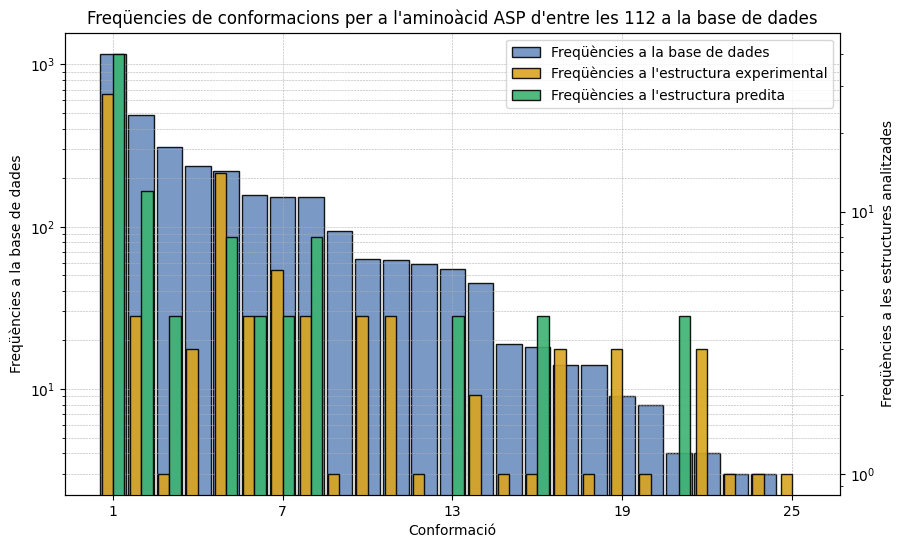

CYS
CYS
[193, 127, 143, 84, 75, 80, 44, 48, 2, 3, 20, 1, 3, 22, 2, 5, 8, 1, 1, 1, 1, 1] [194, 127, 147, 84, 85, 80, 44, 48, 4, 5, 20, 2, 3, 22, 2, 5, 8, 1, 1, 1, 1, 1]
[193 143  75   2   3   1] [ 1  4 10  2  2  1] [ 4  4 12  0  0  0]


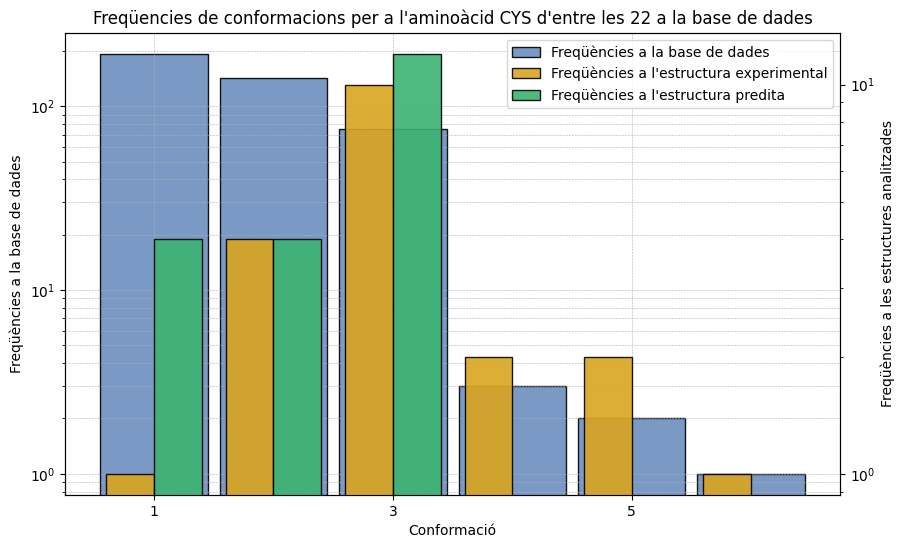

/Users/deumenec/myenv/TFGenv/lib/python3.13/site-packages/MDAnalysis/coordinates/PDB.py:453: UserWarning: 1 A^3 CRYST1 record, this is usually a placeholder. Unit cell dimensions will be set to None.
  warnings.warn("1 A^3 CRYST1 record,"


GLN
GLN
[231, 151, 94, 120, 15, 6, 37, 16, 77, 20, 59, 159, 33, 26, 77, 49, 29, 29, 60, 43, 35, 31, 1, 30, 21, 14, 10, 18, 1, 9, 8, 53, 3, 12, 28, 4, 4, 19, 21, 22, 18, 5, 9, 10, 9, 15, 7, 13, 4, 9, 26, 11, 22, 14, 7, 46, 10, 5, 2, 3, 21, 8, 18, 17, 4, 9, 3, 12, 5, 16, 3, 31, 26, 9, 15, 1, 1, 4, 6, 1, 2, 2, 1, 6, 1, 4, 4, 13, 3, 1, 10, 4, 5, 2, 21, 1, 1, 1, 1, 1, 2, 1, 3, 1, 1, 15, 35, 13, 7, 20, 13, 11, 17, 10, 8, 8, 5, 1, 3, 1, 8, 8, 6, 1, 4, 7, 2, 4, 3, 2, 1, 1, 5, 4, 3, 9, 1, 7, 1, 2, 1, 6, 1, 2, 4, 5, 2, 1, 1, 4, 15, 2, 2, 2, 1, 2, 2, 2, 3, 4, 2, 3, 3, 1, 2, 1, 2, 6, 6, 4, 1, 1, 2, 1, 2, 2, 5, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 4, 2, 2, 1, 1] [232, 151, 95, 120, 15, 6, 37, 16, 79, 20, 59, 160, 33, 26, 79, 50, 32, 29, 60, 43, 35, 31, 1, 30, 21, 14, 10, 18, 1, 12, 8, 53, 3, 12, 28, 4, 4, 19, 21, 22, 18, 5, 9, 10, 9, 17, 7, 13, 4, 9, 28, 11, 22, 14, 7, 46, 10, 5, 2, 3, 21, 8, 18, 17, 4, 9, 3, 12, 5, 16, 3, 31, 26, 9, 16, 1, 1, 7, 6, 1, 2, 2, 1, 6, 1,

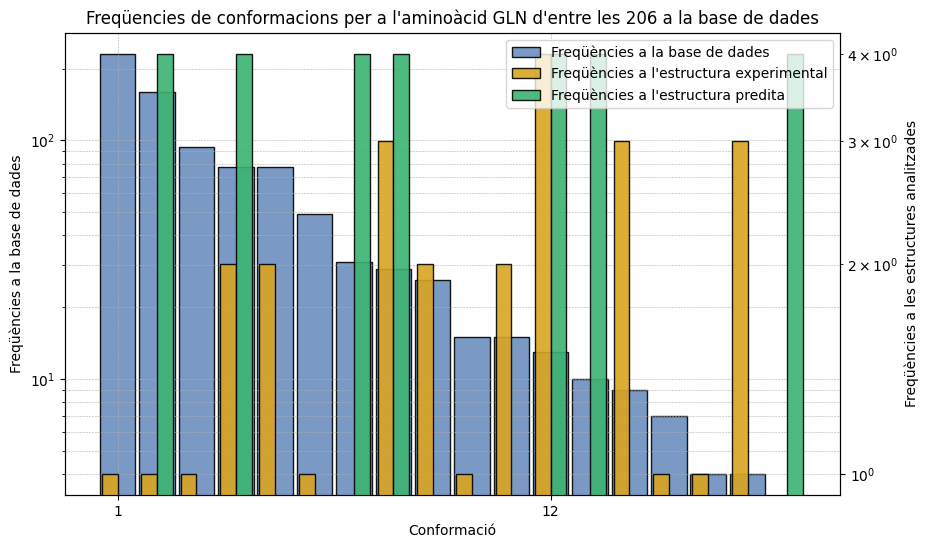

/Users/deumenec/myenv/TFGenv/lib/python3.13/site-packages/MDAnalysis/coordinates/PDB.py:453: UserWarning: 1 A^3 CRYST1 record, this is usually a placeholder. Unit cell dimensions will be set to None.
  warnings.warn("1 A^3 CRYST1 record,"


GLU
GLU
[195, 293, 115, 67, 6, 97, 125, 137, 42, 33, 23, 42, 178, 246, 59, 41, 119, 21, 22, 12, 20, 47, 30, 2, 27, 15, 84, 8, 35, 33, 9, 77, 40, 106, 15, 35, 40, 16, 1, 11, 26, 20, 8, 8, 8, 211, 16, 6, 47, 7, 2, 10, 9, 4, 4, 2, 16, 11, 4, 10, 2, 24, 19, 5, 25, 8, 31, 21, 18, 41, 1, 10, 2, 11, 2, 55, 8, 24, 7, 2, 16, 7, 3, 5, 19, 7, 3, 18, 8, 3, 11, 4, 7, 2, 2, 2, 1, 2, 16, 4, 3, 4, 2, 17, 5, 1, 4, 4, 1, 1, 2, 3, 1, 2, 2, 1, 5, 2, 9, 2, 5, 3, 2, 2, 1, 2, 4, 1, 1, 1, 9, 11, 4, 1, 2, 1, 1, 3, 2, 5, 1, 3, 1, 2, 1, 1, 2, 3, 1, 1, 4, 2, 1, 1, 6, 3, 1, 3, 14, 1, 1, 3, 5, 1, 1, 1, 2, 5, 1, 3, 3, 1, 16, 7, 7, 9, 3, 8, 3, 5, 14, 2, 3, 6, 10, 7, 4, 2, 1, 2, 1, 1, 6, 1, 4, 2, 2, 2, 1, 3, 2, 3, 1, 6, 4, 1, 6, 5, 5, 1, 3, 1, 1, 3, 1, 7, 3, 1, 3, 12, 2, 2, 2, 1, 2, 2, 3, 8, 2, 3, 2, 1, 2, 1, 1, 2, 3, 6, 4, 6, 1, 2, 3, 4, 1, 3, 2, 1, 2, 1, 1, 2, 1, 1, 3, 1, 1, 2, 1, 2, 1, 1, 4, 1, 6, 2, 1, 4, 2, 2, 1, 1, 3, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1] [196, 306, 117, 67, 6, 103, 125, 142, 43, 33, 23, 42, 185, 

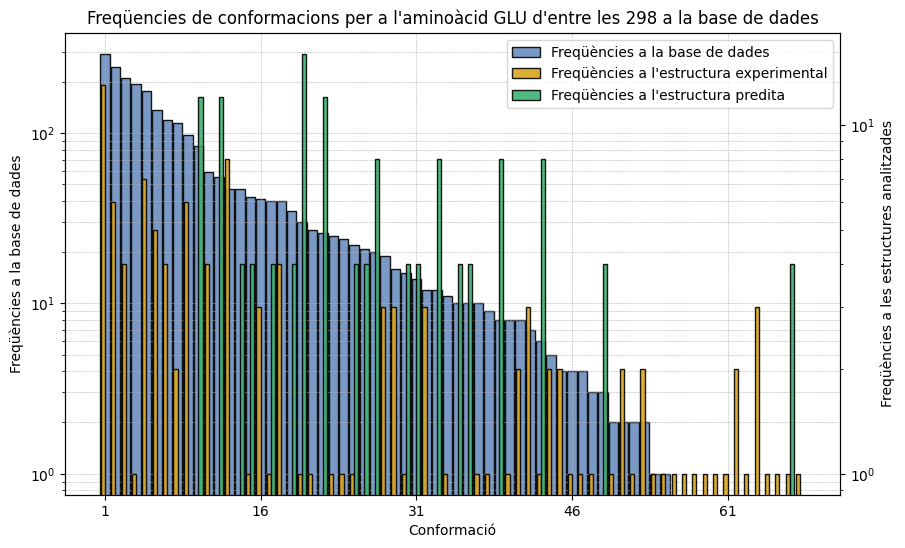

GLY
GLY
[1414, 2177, 1247, 1033, 43, 30] [1446, 2252, 1274, 1077, 47, 32]
[1414 2177 1247 1033   43   30] [32 75 27 44  4  2] [36 75 28 44  4  0]


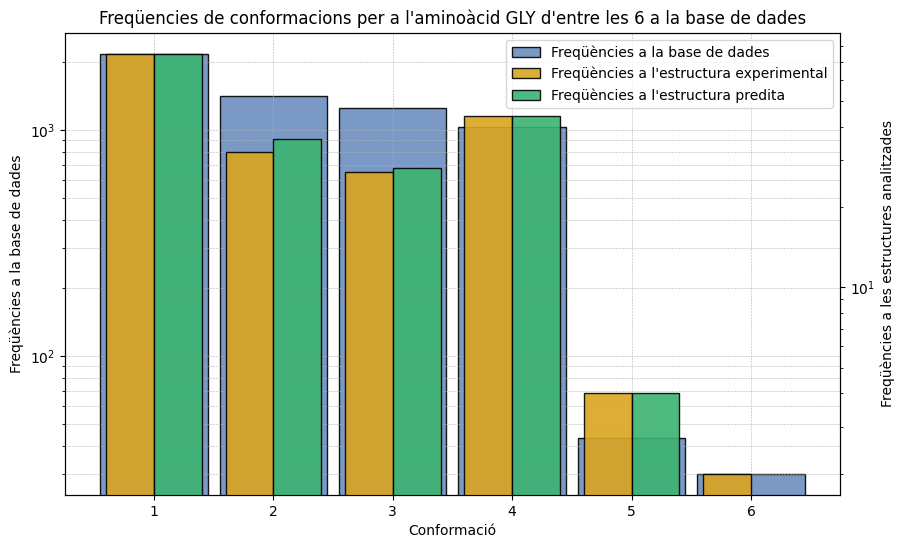

HIS
HIS
[34, 51, 117, 119, 161, 75, 77, 179, 27, 82, 96, 7, 26, 58, 2, 16, 128, 32, 23, 74, 8, 12, 62, 16, 6, 7, 19, 49, 13, 6, 6, 7, 15, 2, 4, 3, 5, 8, 10, 3, 2, 2, 5, 12, 9, 21, 2, 2, 4, 2, 2, 2, 6, 1, 4, 1, 1, 1, 2, 2, 3, 5, 3, 1, 1, 1, 2, 3] [34, 53, 117, 120, 161, 78, 77, 183, 27, 82, 98, 7, 26, 58, 3, 16, 128, 32, 23, 74, 8, 12, 67, 17, 6, 7, 19, 49, 13, 6, 6, 7, 15, 2, 4, 3, 5, 8, 10, 3, 2, 2, 5, 12, 10, 22, 2, 2, 6, 2, 3, 2, 6, 1, 4, 1, 1, 1, 2, 2, 3, 5, 3, 1, 1, 1, 2, 3]
[ 51 119  75 179  96   2  62  16   6   9  21   4   2] [2 1 3 4 2 1 5 1 0 1 1 2 1] [0 4 4 0 8 0 0 0 4 0 0 4 0]


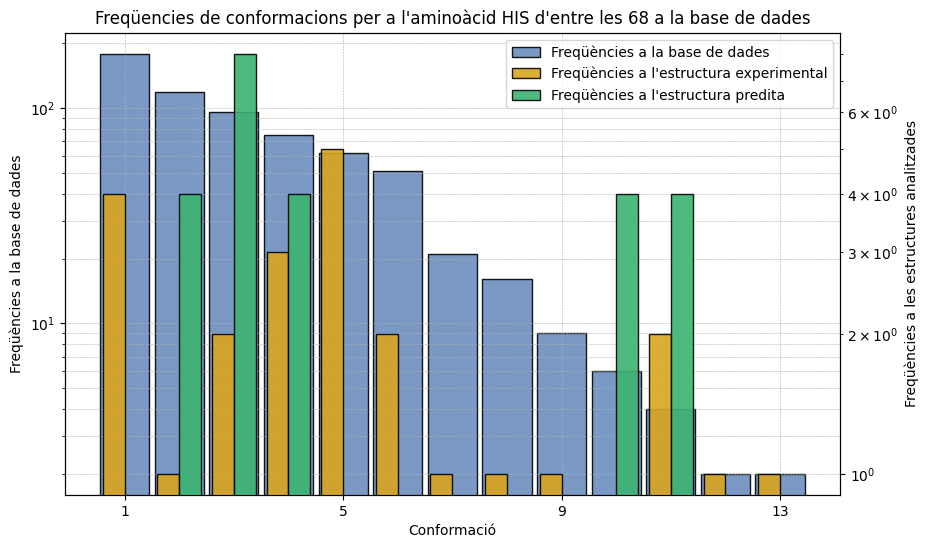

/Users/deumenec/myenv/TFGenv/lib/python3.13/site-packages/MDAnalysis/coordinates/PDB.py:453: UserWarning: 1 A^3 CRYST1 record, this is usually a placeholder. Unit cell dimensions will be set to None.
  warnings.warn("1 A^3 CRYST1 record,"


ILE
ILE
[1085, 313, 232, 243, 271, 1010, 59, 27, 159, 71, 85, 12, 6, 1, 10, 1, 7, 1, 10, 3, 6, 8, 2, 20, 2, 1, 2, 1, 1, 3, 1, 1, 3, 2, 5, 2] [1117, 318, 247, 246, 271, 1030, 60, 27, 163, 71, 96, 12, 6, 1, 11, 1, 7, 1, 10, 3, 6, 8, 2, 20, 2, 1, 2, 1, 1, 3, 1, 1, 3, 2, 5, 2, 1, 1, 3, 3]
[1085  313  232  243 1010   59  159   71   85   10    0    0    0    0] [32  5 15  3 20  1  4  0 11  1  1  1  3  3] [32  4 16  4 24  0  4  4 12  0  0  0  0  0]


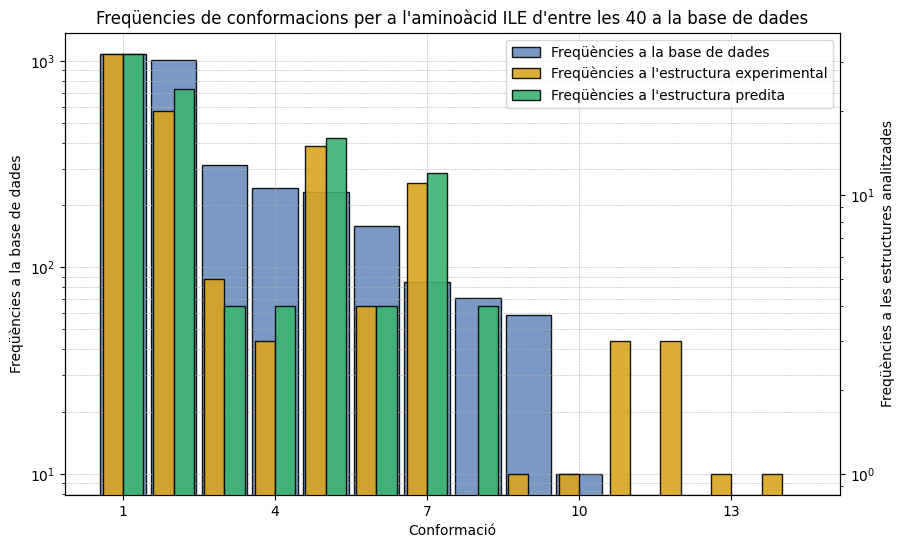

/Users/deumenec/myenv/TFGenv/lib/python3.13/site-packages/MDAnalysis/coordinates/PDB.py:453: UserWarning: 1 A^3 CRYST1 record, this is usually a placeholder. Unit cell dimensions will be set to None.
  warnings.warn("1 A^3 CRYST1 record,"


LEU
LEU
[2580, 1017, 1336, 70, 46, 715, 51, 12, 62, 48, 40, 19, 3, 22, 3, 8, 47, 57, 3, 19, 1, 16, 6, 2, 16, 5, 10, 64, 2, 5, 2, 5, 10, 3, 5, 1, 16, 28, 2, 2, 29, 56, 16, 2, 12, 14, 6, 6, 3, 4, 2, 2, 2, 3, 3, 1, 1, 1, 1, 1, 3, 1, 1, 2, 2, 2, 7] [2607, 1026, 1374, 70, 46, 737, 55, 13, 62, 52, 40, 24, 3, 22, 5, 8, 49, 57, 3, 19, 1, 16, 7, 2, 19, 5, 10, 67, 2, 11, 2, 5, 10, 3, 5, 1, 17, 30, 2, 3, 30, 60, 20, 2, 12, 14, 6, 6, 3, 4, 2, 3, 2, 3, 3, 1, 1, 1, 1, 1, 3, 1, 1, 2, 2, 2, 7, 1, 3, 1, 1, 1]
[2580 1017 1336  715   51   12   48   19    3   47   57    6   16   64
    5   16   28    2   29   56   16    2    0    0    0    0    0] [27  9 38 22  4  1  4  5  2  2  0  1  3  3  6  1  2  1  1  4  4  1  1  3
  1  1  1] [52 16 44 20  4  4  4  0  0  4  4  0  4  0  0  0  0  0  0  0  0  0  0  0
  0  0  0]


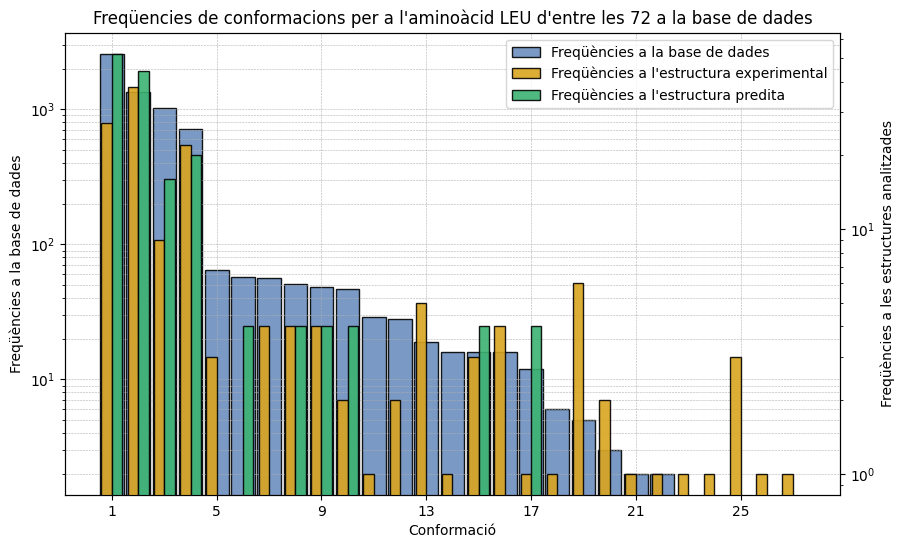

/Users/deumenec/myenv/TFGenv/lib/python3.13/site-packages/MDAnalysis/coordinates/PDB.py:453: UserWarning: 1 A^3 CRYST1 record, this is usually a placeholder. Unit cell dimensions will be set to None.
  warnings.warn("1 A^3 CRYST1 record,"


LYS
LYS
[198, 258, 202, 67, 76, 45, 250, 59, 34, 35, 68, 23, 14, 26, 46, 41, 60, 54, 4, 35, 31, 12, 16, 12, 15, 22, 26, 41, 21, 29, 1, 2, 2, 9, 9, 158, 26, 13, 1, 30, 2, 52, 4, 9, 7, 6, 9, 18, 8, 2, 6, 4, 7, 109, 19, 11, 12, 22, 28, 18, 1, 11, 19, 12, 8, 14, 1, 5, 7, 5, 4, 48, 15, 2, 43, 5, 3, 3, 9, 12, 13, 3, 12, 28, 5, 9, 2, 1, 2, 1, 3, 7, 8, 4, 8, 3, 12, 2, 3, 6, 1, 6, 3, 2, 2, 7, 3, 5, 5, 28, 1, 2, 1, 2, 6, 10, 1, 3, 5, 3, 3, 1, 6, 4, 3, 6, 4, 3, 1, 3, 1, 4, 1, 1, 3, 2, 3, 4, 2, 1, 1, 1, 7, 1, 4, 1, 1, 3, 5, 1, 7, 1, 7, 1, 4, 1, 2, 1, 3, 1, 2, 1, 3, 3, 2, 2, 2, 3, 2, 1, 2, 1, 1, 1, 1, 1, 1, 3, 3, 3, 7, 3, 2, 1, 2, 1, 1, 1, 2, 3, 7, 3, 3, 1, 1, 7, 2, 6, 1, 1, 1, 3, 1, 1, 2, 2, 1, 2, 2, 1, 2, 1, 4, 3, 1, 2, 1, 1, 2, 2, 3, 1, 3, 1, 1, 2, 1, 6, 1, 1, 1, 2, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 18, 24, 4, 2, 1, 6, 3, 3, 11, 1, 14, 3, 1, 3, 8, 1, 2, 1, 2, 3, 3, 1, 1, 3, 2, 4, 2, 2, 1, 1, 1, 4, 1, 3, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 8, 2, 2, 1, 2, 1, 1, 1, 1, 1, 2, 3, 5, 1, 1, 1, 1, 2, 1, 3, 1

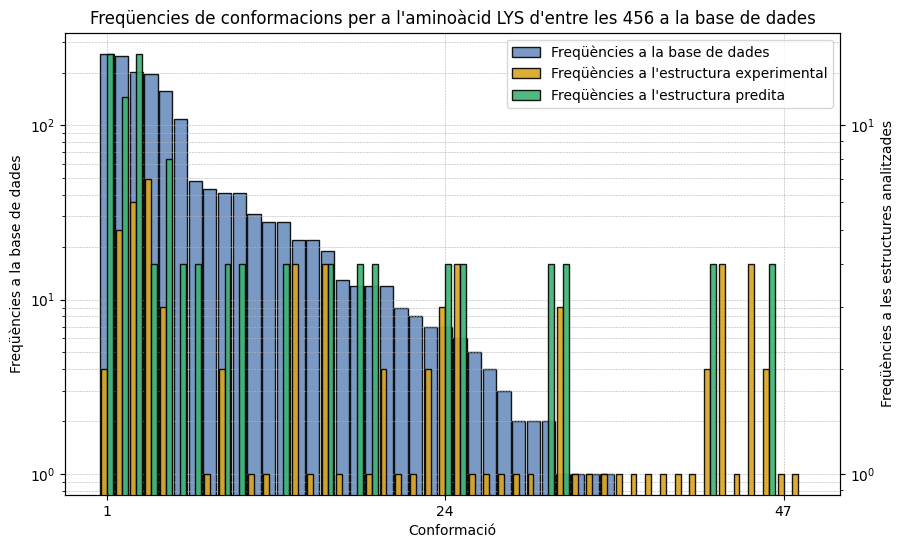

/Users/deumenec/myenv/TFGenv/lib/python3.13/site-packages/MDAnalysis/coordinates/PDB.py:453: UserWarning: 1 A^3 CRYST1 record, this is usually a placeholder. Unit cell dimensions will be set to None.
  warnings.warn("1 A^3 CRYST1 record,"


MET
MET
[119, 156, 40, 98, 57, 18, 12, 58, 12, 39, 49, 63, 51, 8, 86, 22, 16, 12, 7, 1, 1, 5, 67, 12, 1, 23, 20, 34, 2, 17, 11, 13, 21, 2, 6, 26, 2, 12, 6, 21, 2, 1, 6, 1, 3, 7, 5, 36, 1, 4, 8, 14, 5, 2, 2, 3, 1, 7, 1, 3, 2, 1, 1, 12, 2, 4, 3, 5, 4, 6, 1, 4, 18, 1, 4, 1, 4, 10, 4, 1, 3, 1, 6, 2, 5, 1, 12, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 8, 5, 2, 2, 2, 2, 2, 1, 2, 6, 5, 1, 1, 1, 3, 2, 18, 1, 2, 1, 1, 1, 1, 1, 6, 1, 4, 2, 1, 2, 2, 1, 1, 1, 2, 4] [120, 156, 40, 98, 57, 18, 16, 58, 12, 39, 52, 63, 51, 13, 86, 22, 16, 12, 7, 1, 1, 5, 67, 12, 1, 23, 20, 34, 2, 17, 11, 13, 21, 2, 6, 26, 2, 12, 6, 21, 2, 1, 6, 1, 3, 7, 5, 39, 1, 4, 8, 14, 5, 2, 2, 3, 1, 13, 1, 3, 2, 1, 1, 12, 5, 6, 3, 5, 4, 6, 1, 4, 18, 1, 4, 1, 4, 10, 4, 1, 3, 1, 7, 2, 5, 1, 12, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 8, 5, 2, 2, 3, 2, 2, 1, 2, 6, 5, 1, 1, 1, 3, 2, 18, 2, 2, 1, 1, 1, 2, 1, 6, 1, 4, 2, 1, 2, 2, 1, 1, 1, 2, 4, 2, 1]
[119 156  12  49   8  67  36   7   2   4   4   6   1   2   1   1   1   0
   0] [1 0 4 3 5 0 3 6 3 2 0 

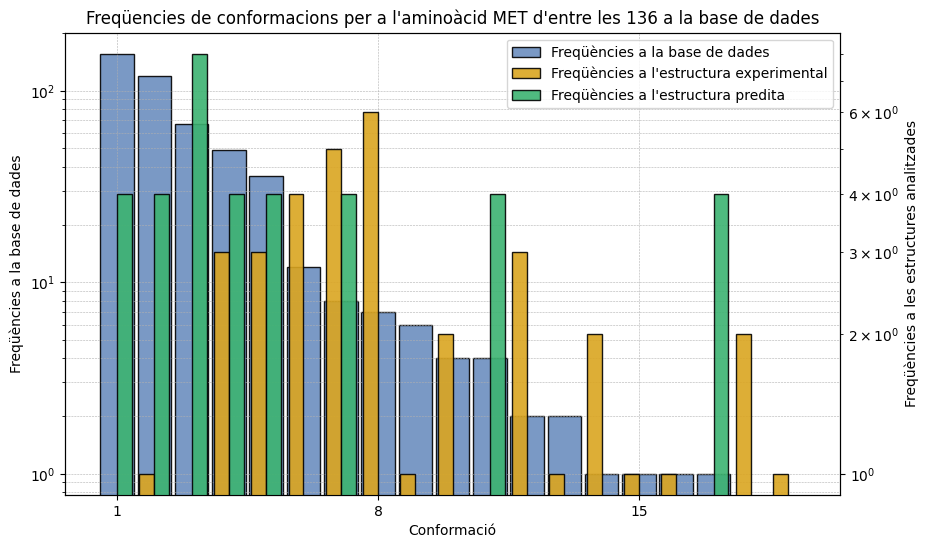

/Users/deumenec/myenv/TFGenv/lib/python3.13/site-packages/MDAnalysis/coordinates/PDB.py:453: UserWarning: 1 A^3 CRYST1 record, this is usually a placeholder. Unit cell dimensions will be set to None.
  warnings.warn("1 A^3 CRYST1 record,"


PHE
PHE
[428, 75, 225, 365, 92, 124, 142, 106, 42, 491, 104, 119, 83, 118, 35, 2, 31, 5, 6, 2, 12, 31, 20, 28, 39, 2, 3, 14, 29, 7, 29, 10, 5, 11, 3, 1, 4, 2, 2, 2, 3, 10, 7, 2, 6, 7, 2, 4, 1, 3, 2, 2, 3, 2, 1, 2, 2, 1, 1, 1, 4, 2, 4] [440, 79, 225, 386, 96, 132, 146, 109, 42, 499, 104, 120, 83, 122, 35, 2, 31, 5, 6, 6, 20, 31, 20, 28, 39, 2, 3, 14, 30, 7, 29, 10, 5, 11, 3, 1, 4, 2, 2, 2, 3, 10, 7, 2, 6, 7, 2, 4, 1, 3, 2, 2, 3, 2, 1, 2, 2, 1, 1, 1, 4, 2, 4, 2]
[428  75 365  92 124 142 106 491 104 119  83 118   2  12  29  10   4   0] [12  4 21  4  8  4  3  8  0  1  0  4  4  8  1  0  0  2] [12 14 24  0  0  0  0  0  8  0  2  0  0  8  0 10  2  4]


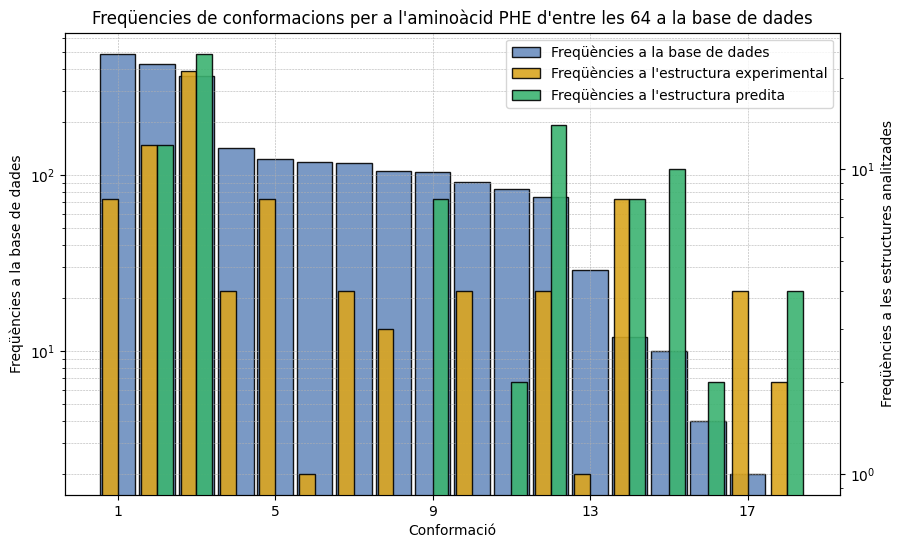

PRO
PRO
[801, 844, 1141, 895, 53, 10, 3, 2, 1, 4] [825, 859, 1161, 928, 56, 11, 3, 2, 1, 4]
[ 801  844 1141  895   53   10] [24 15 20 33  3  1] [27 16 16 36  4  0]


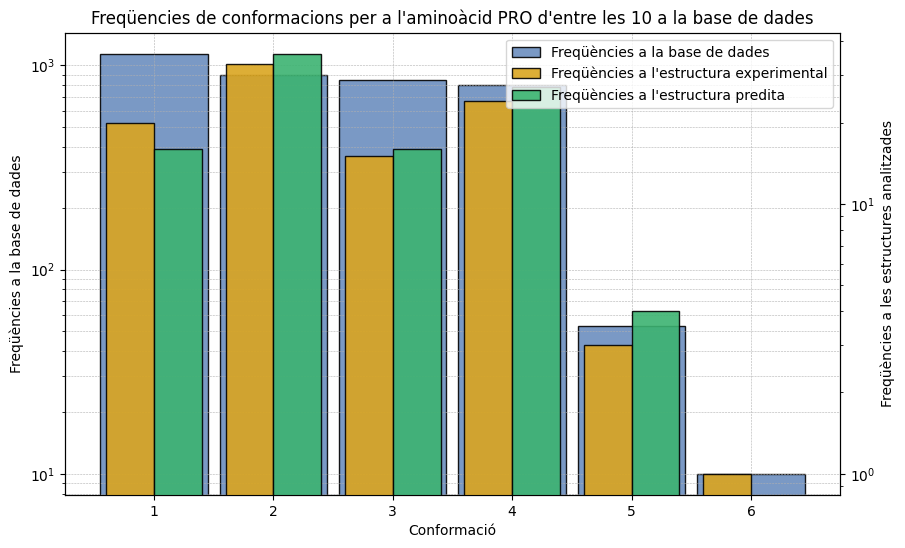

SER
SER
[959, 386, 813, 235, 47, 89, 368, 487, 312, 123, 37, 26, 7, 46, 1, 4, 3, 3, 20, 4, 1, 1, 1, 2, 2, 1, 1, 1, 6, 1, 1] [980, 399, 824, 243, 47, 92, 382, 493, 314, 128, 41, 26, 8, 46, 1, 6, 3, 3, 20, 4, 1, 1, 1, 2, 2, 1, 1, 1, 6, 1, 1, 1, 1]
[959 386 813 235  89 368 487 312 123  37   7   4   0   0] [21 13 11  8  3 14  6  2  5  4  1  2  1  1] [24 12 12  8  0 12 16  4  4  0  0  0  0  0]


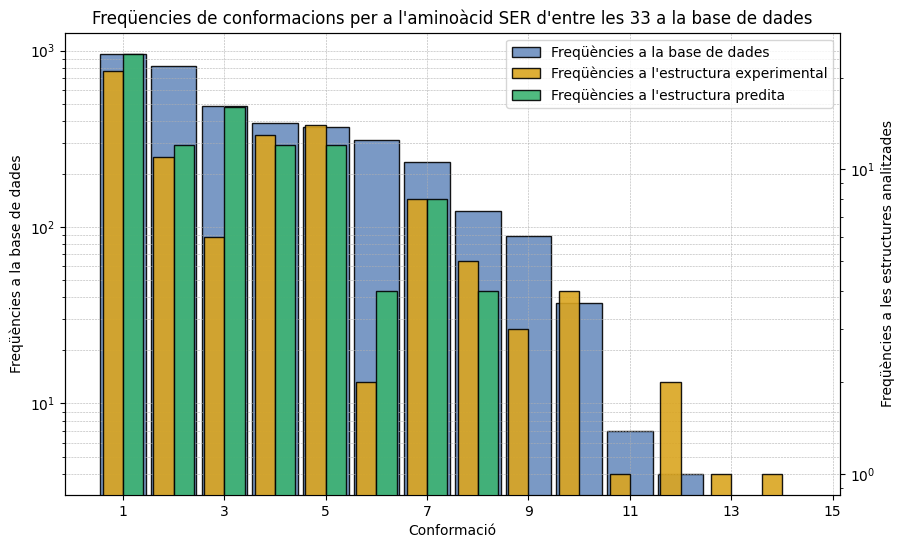

THR
THR
[1053, 1054, 1135, 1135, 277, 63, 19, 35, 16, 2, 6, 4, 2, 1, 4, 4, 10, 1, 2, 2, 2, 1, 1, 2, 2, 1] [1079, 1070, 1159, 1151, 293, 67, 21, 35, 16, 2, 6, 6, 2, 1, 5, 4, 10, 1, 2, 2, 2, 1, 1, 2, 2, 1, 1]
[1053 1054 1135 1135  277   63   19    4    4    0] [26 16 24 16 16  4  2  2  1  1] [28 20 24 16 16  4  0  0  0  0]


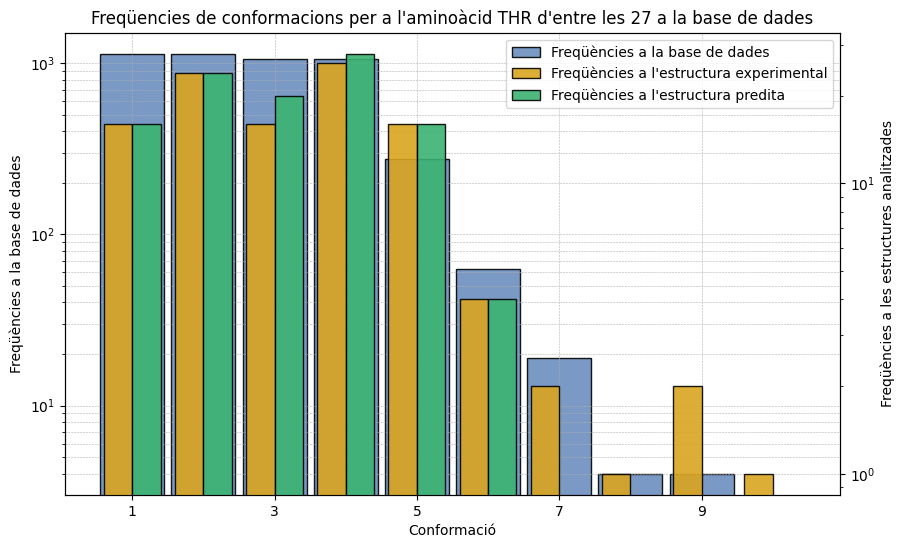

/Users/deumenec/myenv/TFGenv/lib/python3.13/site-packages/MDAnalysis/coordinates/PDB.py:453: UserWarning: 1 A^3 CRYST1 record, this is usually a placeholder. Unit cell dimensions will be set to None.
  warnings.warn("1 A^3 CRYST1 record,"


TRP
TRP
[78, 73, 67, 41, 161, 101, 177, 73, 86, 80, 12, 29, 15, 18, 7, 40, 8, 11, 13, 6, 27, 2, 4, 7, 7, 2, 4, 24, 14, 14, 7, 1, 14, 2, 4, 2, 5, 3, 2, 4] [78, 73, 67, 41, 161, 101, 181, 81, 89, 80, 12, 29, 15, 18, 7, 40, 16, 11, 13, 6, 27, 2, 4, 7, 7, 2, 4, 24, 14, 14, 8, 1, 17, 2, 4, 2, 5, 4, 2, 4]
[161 177  73  86   8   7  14   3] [0 4 8 3 8 1 3 1] [4 4 8 4 8 0 0 0]


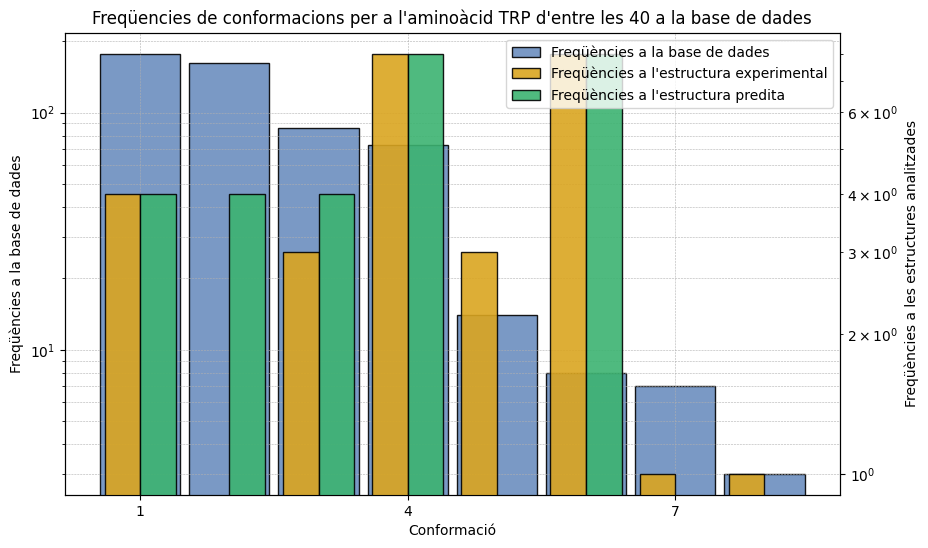

/Users/deumenec/myenv/TFGenv/lib/python3.13/site-packages/MDAnalysis/coordinates/PDB.py:453: UserWarning: 1 A^3 CRYST1 record, this is usually a placeholder. Unit cell dimensions will be set to None.
  warnings.warn("1 A^3 CRYST1 record,"


TYR
TYR
[407, 288, 10, 104, 121, 103, 66, 319, 364, 90, 67, 179, 19, 23, 11, 5, 9, 6, 7, 14, 77, 4, 32, 13, 4, 24, 3, 32, 8, 4, 5, 10, 15, 8, 4, 2, 3, 7, 1, 8, 1, 7, 1, 3, 3, 2, 1] [419, 292, 10, 104, 121, 103, 66, 325, 372, 90, 67, 179, 21, 23, 11, 5, 9, 6, 7, 18, 77, 4, 32, 13, 4, 24, 3, 32, 8, 4, 5, 10, 15, 12, 4, 2, 3, 7, 1, 8, 1, 7, 1, 3, 3, 2, 1]
[407 288 319 364  90  19  14  77   8   0   0] [12  4  6  8  0  2  4  0  4  0  0] [12  0  0  8  4  0  0  4  4  4  4]


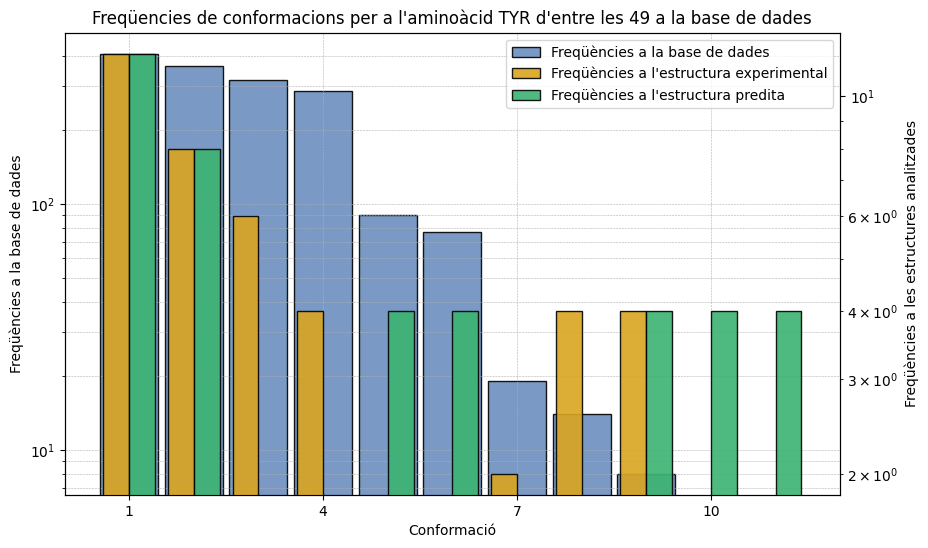

/Users/deumenec/myenv/TFGenv/lib/python3.13/site-packages/MDAnalysis/coordinates/PDB.py:453: UserWarning: 1 A^3 CRYST1 record, this is usually a placeholder. Unit cell dimensions will be set to None.
  warnings.warn("1 A^3 CRYST1 record,"


VAL
VAL
[1928, 1738, 18, 533, 144, 290, 238, 8, 8, 15, 4, 1, 4, 2, 1, 2, 3, 4, 2, 1, 4, 1, 1] [1999, 1782, 18, 549, 148, 299, 240, 9, 9, 15, 4, 2, 4, 3, 1, 2, 3, 4, 2, 1, 5, 6, 1, 2, 1, 1]
[1928 1738  533  144  290  238    8    8    1    2    4    1    0    0
    0] [71 44 16  4  9  2  1  1  1  1  1  5  2  1  1] [72 44 20  4 12  0  0  0  0  0  4  0  0  0  0]


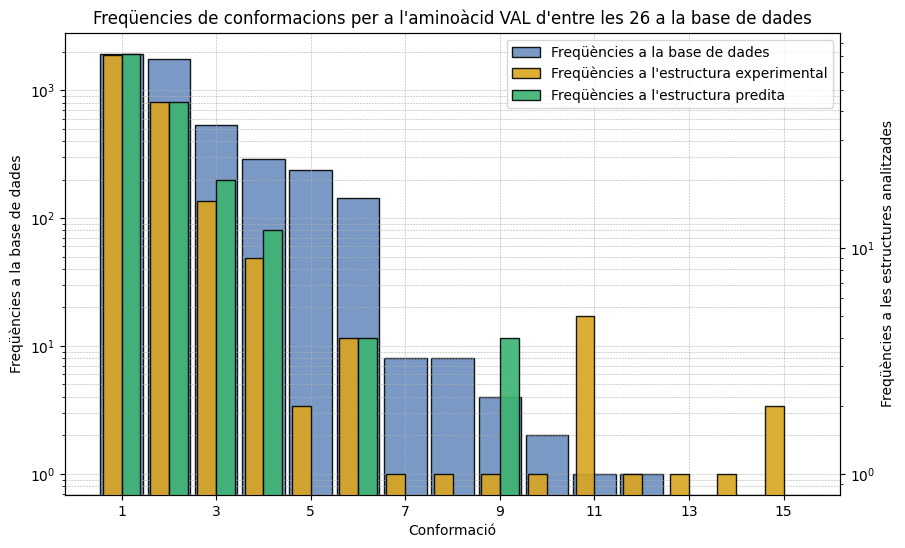

In [ ]:
extra_name = "helou"
while True:
    analized_prote1  = input("Quin fitxer de proteïna vols analitzar? Escriu break per parar")
    
    if analized_prote1 == "break":
        break
        
    analized_prote2  = input("Quin fitxer de proteïna conté el model d'alphafold?")
    
    u1 = mda.Universe(config.source_2+"/"+analized_prote1)
    u2 = mda.Universe(config.source_2+"/"+analized_prote2)
    for i in range(len(aminoacid_ensemble)):
        aminoacid_ensemble[i].open()
        freq_1, freq_2 = aminoacid_ensemble[i].frequencies_vector(u1)
        aminoacid_ensemble[i].open()
        freq_1, freq_3 = aminoacid_ensemble[i].frequencies_vector(u2)
        print(freq_1, freq_2)
        useful_functions.triple_ploter(freq_1, freq_2, freq_3,config.output + "/"+extra_name +os.path.splitext(analized_prote1)[0]+"multiplot", config.aminoacids[i], "pdf",
                                       ploter_show=True, masking = True, ordering = True) #+os.path.splitext(analized_prote1)[0]



    